### ECE/CS/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2022 ###

# Energy Optimization #

#### YUXIN CAO (cao224@wisc.edu), SAKETH CHALLA (spchalla@wisc.edu), ANUSHKA CHANDRASHEKAR (achandrashe4@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
  1. [Problem Description](#1.A.-Problem-Description)
  1. [Data Description](#1.B.-Data-Description)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Integrated Model](#2.A.-Integrated-Model:-Economic-Environmental-Trade-Off)
  1. [Electricity Model](#2.B.-Electricity-Model)
1. [Solution](#3.-Solution)
  1. [Integrated Model](#3.A.-Integrated-Model)
    1. [Economic Mode](#3.A.a.-Economic-Mode)
    1. [Economic-Environmental Mode](#3.A.b.-Economic-Environmental-Mode)
  1. [Electricity Model](#3.B.-Electricity-Model)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Integrated Model](#4.A.-Integrated-Model)
    1. [Economic Mode](#4.A.a.-Economic-Mode)
    1. [Economic-Environmental Mode](#4.A.b.-Economic-Environmental-Mode)
  1. [Electricity Model](#4.B.-Electricity-Model)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Our project intends to develop a linear optimization model to minimize the total cost as well as the carbon emissions associated with U.S. annual energy consumption, while simultaneously meeting the demands of energy use in different sectors.

According to the Annual Energy Outlook 2022 published by the U.S. Energy Information Administration (EIA)[[1]](https://www.epa.gov/ghgemissions/overview-greenhouse-gases), crude oil production is higher than it has ever been. In addition, oil and gas prices are predicted to rise and then flatten out around 2050. This discovery is in direct contrast with the United States’ overall goal to decarbonize the energy sector and reduce greenhouse gas emissions. Carbon dioxide accounted for 79% of all U.S. greenhouse gas emissions in 2020 [[2]](https://www.epa.gov/ghgemissions/overview-greenhouse-gases). In the United States, most of the emissions of greenhouse gases caused by human activities come primarily from burning fossil fuels—coal, natural gas, and petroleum—for energy use. The following diagram from EIA's Monthly Energy Review indicates that petroleum was the major source of U.S. energy-related carbon emissions, and transportation was the end-use sector that generated the most amount of carbon dioxide.

![eia-2021b.png](https://cdn.ihsmarkit.com/www/images/0721/eia-2021b.png)

Thus, in this project, our client will be the U.S. Department of Energy, who is interested in mitigate the environmental impacts of energy consumption. We will design a linear program that attempts to minimize the cost of energy consumption in the USA. Our ultimate goal is to reduce the United States’ contribution to climate change and ease the financial burden of American residents. Therefore, we will also design a regularization program that attempts to minimize both the total cost and total carbon emissions caused by energy consumption in the U.S.

### 1.A. Problem Description ###

To understand the changing energy dynamics within the American energy sector, we will focus on using a linear program to understand the usage of energy that aims to minimize overall energy consumption cost. We will start with an integrated model that takes all energy sources and energy sectors into account. This will be a network flow problem where we are deciding the amount of each energy source consumed by each sector, while satisfying the demand of energy in each sector.

Generally, U.S. energy consumption is categorized into five sectors, including electricity, transportation, industrial, residential, and commercial. To better understand the dynamics of energy consumption in each of these sectors and the impact of switching to renewables, we will also be assessing the impact of this change upon individual sectors. We would build and solve a linear model for the electricity sector as an example, illustrating how energy is distributed within an individual sector in a way that minimize the cost associated with its energy consumption while meeting certain targets of carbon emissions. 

For both models, we will address the problem using same model for years 2020, 2030 and 2050 so that we can compare how the distribution of energy consumption will change over the next few decades.

### 1.B. Data Description ###

The data (i.e. problem parameters) used for this project was extracted from the Internet. A major source of data is the Annual Energy Review published by the U.S. Energy Information Administration (EIA), providing information about the amount of primary and total energy consumption by sector[[3]](https://www.eia.gov/totalenergy/data/browser/index.php?tbl=T02.01#/?f=A&start=1949&end=2021&charted=3-6-9-12) as well as energy production by source[[4]](https://www.eia.gov/totalenergy/data/browser/index.php?tbl=T01.02#/?f=A) in the U.S. from 1950 to 2021. 

EIA also provides data about prices of fossil fuels, including petroleum, natural gas, and coal, by source as well as retail prices of electricity by end-use sector in 2020. The costs of renewable energys could be represented by the Levelized Cost of Energy (LCOE), which is a measure of the average net present cost of electricity generation for a generating plant over its lifetime [[5]](https://www.energy.gov/sites/prod/files/2015/08/f25/LCOE.pdf). In general, it is calculated by the lifetime cost of a generating plant divided by its total energy production over lifetime. The following image is the LCOE of some renewable energy in 2020:

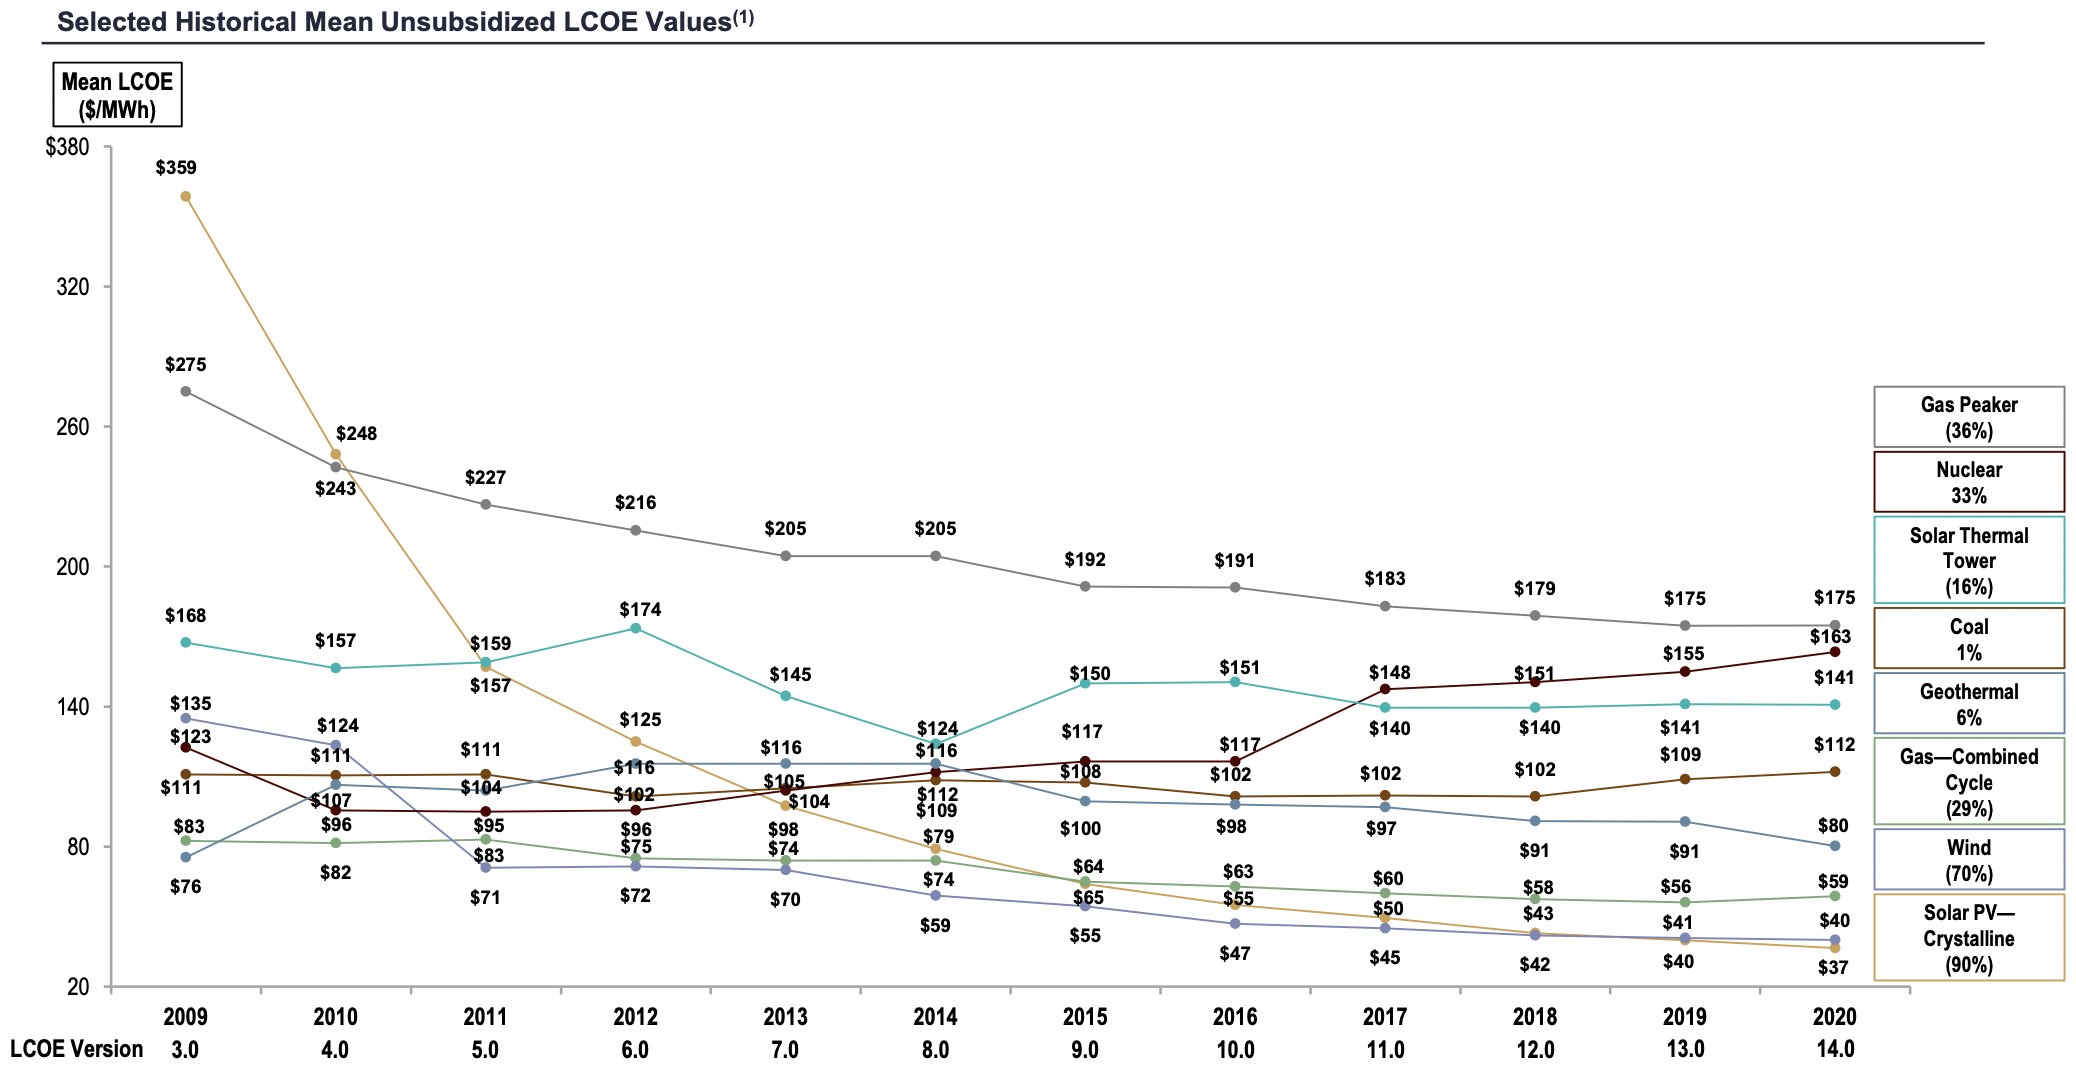
Source: Lazard's Levelized Cost of Energy Analysis-Version 14.0 [[6]](https://www.lazard.com/media/451419/lazards-levelized-cost-of-energy-version-140.pdf)

In order to predict U.S. energy consumption in the future, we need to gather predicted energy-related data in 2030 and 2050. For the integrated model, we obtained predictions about energy production by source and consumption by sector as well as energy prices in 2030 and 2050 [[7]](https://www.eia.gov/outlooks/aeo/data/browser/#/?id=1-AEO2022&cases=ref2022&sourcekey=0). For the electricity model, we use the least squares method to make predictions about future electricity consumption based on historical trends in past years. More details are provided along with code implementation.

In addition, EIA provides information about carbon dioxide emissions resulted from U.S. energy consumption by source. Coal, natural gas, and petroleum are major sources of energy-related carbon emissions. Comparably, renewable energy sources generate much less carbon dioxide and some sources are almost "carbon neutral". We also find data about carbon dioxide emissions targets in future years set by environmental groups/Paris Accord, so that they can be used in one of the constraints in the electricity model.

## 2. Mathematical model ##

To get started, we will implement an integrated model that incorporate energy use in different categories and find optimal solutions according to our objectives. In order not to overcomplicate our model, we made the following **assumptions**:
* Each source energy is consumed in only one fuel form (e.g. we would not consider whether the petroleum used is gasoline, diesel fuel or fuel oil)
* Costs of renewable energys are the same across sectors (use LCOE)
* Carbon dioxide emission rates of energy source did not differ by sector
* Average efficiency of source energy in electricity generation does not change over time (due to lack of data for 2030 and 2050)
* Average carbon emission rates of source energy does not change over time (again due to inadequate data)

There are two "modes" of this model. The economic mode only attempts to minimize the total cost of energy consumption in the objective function, which is a **linear program**. The economic-environmental mode attempts to minimize not only the total cost, but also the total energy-related carbon emissions, which becomes a **regularization problem**. A mathematical description of this model is given below. 

### 2.A. Integrated Model: Economic-Environmental Trade-Off ###

The following diagram illustrates how the problem is set up. Each of the left-hand-side nodes represents a type of energy source (renewable energy includes hydroelectric power, geothermal, biomass, solar and wind energy), and each of the right-hand-side nodes represents an end-use sector. 

The decision variables in this model are denoted by arrows in the diagram, which is the amount of energy transmitted from the source node to destination node. Source energy can be directly consumed by the end-use sectors or can be consumed by the electric power sector to generate electricity, and then end-use sectors can consumed electricity generated by the electric power sector. 

There will be an upper limit on the supply of each type of source energy, so one constraint of the model is to ensure consumption of each source energy does not exceed the maximum capacity. There will be similar constraints on the demand of each end-use sector, which indicates that the energy consumption in the United States should be able to seamlessly provide power to the grid so as to not disrupt the lives of everyday individuals. The objective function for this program would take account of both the total cost and total carbon emissions caused by energy consumption, as we hope to minimize the impact that this transition has upon the American population as well as the impact of the US energy sector upon global climate change. 

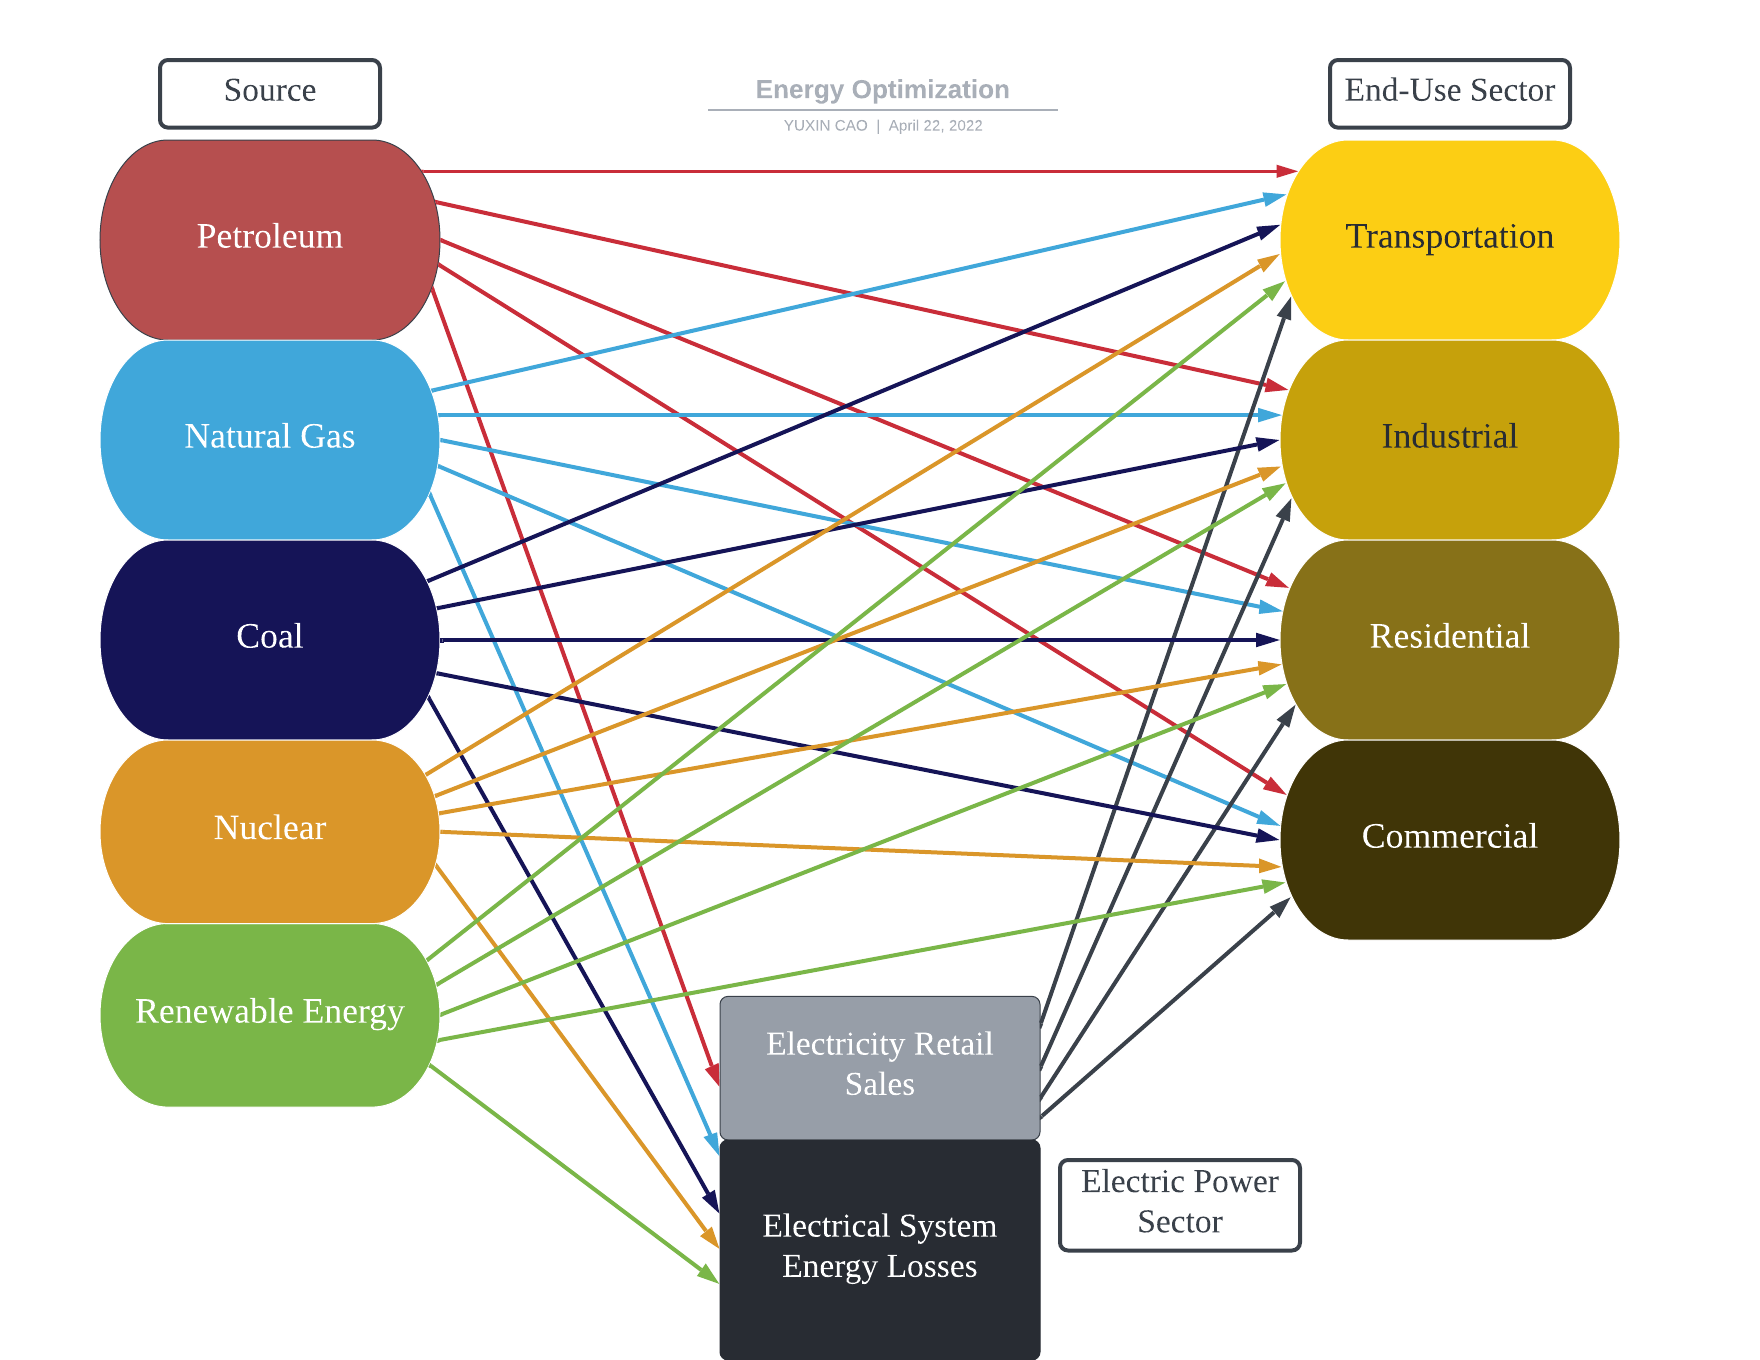

#### Decision variables
The decision variable $x_{ij} \geq 0$ represents the amount of energy source $i$ directly consumed by end-use sector $j$. In other words, it is the primary energy consumption of source $i$ by end-use sector $j$. 

Let $y_i \geq 0$ denotes the amount of energy source $i$ input into the eletric power sector. 

Let $z_j \geq 0$ denotes the amount of electricity retail sales to sector $j$. 

Let $l_j \geq 0$ denote the energy losses in end-use sector $j$. 

First, we need to encode the energy sources and sectors as following:

$$
i = 
\begin{cases}
  1 & \text{if energy source is petroleum} \\
  2 & \text{if energy source is natural gas} \\
  3 & \text{if energy source is coal} \\
  4 & \text{if energy source is nuclear} \\
  5 & \text{if energy source is hydroelectric power} \\
  6 & \text{if energy source is geothermal} \\
  7 & \text{if energy source is solar energy} \\
  8 & \text{if energy source is wind energy} \\
  9 & \text{if energy source is biomass}
\end{cases}
$$

$$
j = 
\begin{cases}
  1 & \text{if sector is transportation} \\
  2 & \text{if sector is industrial} \\
  3 & \text{if sector is residential} \\
  4 & \text{if sector is commercial}
\end{cases}
$$

#### Constraints
The supply of each energy source cannot exceed its annual production:
$$\sum_{j=1}^{4} x_{ij} + y_i \leq S_i \quad \forall i \in \{1,...,9\}$$
where $S_i$ is the total supply of energy in trillion Btu of energy source $i$.

Primary energy consumption should be greater than predicted demand in each end-use sector:
$$\sum_{i=1}^{9} x_{ij} \geq D_j \quad \forall j \in \{1,...,4\}$$
where $D_j$ is the primary energy consumption in trillion Btu in sector $j$.

Total losses are calculated as the primary energy consumed by the electric power sector minus the total electricity retail sales:
$$\sum_{j=1}^{4} l_j = \sum_{i=1}^{9} y_i - \sum_{j=1}^{4} z_j$$

Total energy consumption in the end-use sectors is the sum of primary energy consumption, electricity retail sales, and electrical system energy losses:
$$\sum_{i=1}^{9} x_{ij} + z_j + l_j \geq T_j \quad \forall j \in \{1,...,4\}$$
$$z_j + l_j = T_j - D_j \quad \forall j \in \{1,...,4\}$$
where $T_j$ is the total energy consumption in trillion Btu in sector $j$.

Usually, some energy is lost in conversion inside the electrical system. The technology and the type of fuel used to generate electricity affect the efficiency of power plants, so we assume that the total electricity retail sales is only a fractoin of the total energy input into the electric power sector:
$$\sum_{j=1}^{4} z_j = \sum_{i=1}^{9} e_i y_i$$
where $e_i$ is the average efficiency of source $i$ in electric power generation.

#### Objective 1: Economic Mode
The first version of objective only considers the economic aspect of energy consumption, so the goal is to minimize the total cost of energy consumption:
$$\underset{x_{ij},y_i,z_j}{\text{minimize}}\qquad \sum_{j=1}^{4} \sum_{i=1}^{9} c_{ij} x_{ij} + \sum_{i=1}^{9} f_iy_i + \sum_{j=1}^{4} b_jz_j$$
where $c_{ij}$ is the cost for end-use sector $j$ to consume energy source $i$, $f_i$ is the cost for electric power sector to consume energy source $i$, and $b_j$ is the electricity retail price to end-use sector $j$.

#### Objective 2: Economic-Environmental Mode
The second version of objective consider not only the economic interest but also the environmental impact of energy consumption, so the total carbon dioxide emissions result from energy consumption are added as a regularizer $R(x,y,z)$:
        $$\underset{x_{ij},y_i,z_j}{\text{minimize}}\qquad (1-\lambda)\sum_{j=1}^{4} \sum_{i=1}^{9} c_{ij} x_{ij} + \sum_{i=1}^{9} f_iy_i + \sum_{j=1}^{4} b_jz_j + \lambda R(x,y,z)$$
$$R(x,y,z) = \sum_{j=1}^{4} \sum_{i=1}^{9} P_{i}x_{ij} + \sum_{i=1}^{9} P_{i} y_{i} + \sum_{j=1}^{4} Q_{j} z_{j}$$
$$\lambda \in [0,1]$$
where $P_{i}$ is the average amount of carbon emissions produced by consuming one unit of energy source $i$ in any end-use sector or electric power sector, and $Q_j$ is the CO2 emissions produced by consuming one unit of electricity in any end-use sector. $R(x,y,z)$ can be interpreted as a "1-norm" minimizing the sum of absolute total carbon emissions in each sector.

### 2.B. Electricity Model ###


To better assess the impact the switch to renewables will have upon the United States economy, we will assess the impact of these changes upon seperate energy sectors and will use electricity sector as an example. For the electricity sector we will use historical data to forecast future energy usage and then will examine the effect that switch towards renewables has upon the sector. We hope that such analysis will aid in the transition away from fossil fuels.

To better understand the impact of moving away from use fossil fuels, we plan to construct a set of model that helps us understand the specifics of the transition away from fossil fuels. This model will be a linear model, and will be constructed as follows. The decision variables in our models will be the relative amounts of energy used to meet demand: namely energy derived from solar, wind, hydrothermal, geothermal, nuclear, coal, oil and natural gas. The amounts of energy produced from each of these energy sources serve as the decision variables in our mathematical model. One constraint on our model is that the total carbon emitted by all of the energy sources should remain below the thresholds posed by the Biden adminstration in their most recent report. In addition, the sum of the energy produced by each of the source should meet the sectors energy demand as to ensure a seamless transition between energy types. We aim to minimize the total cost of energy production, we to ensure energy remains affordable to the various sectors. Mathematically, this basic model is described below. 

$$
\begin{aligned}
\underset{c,s,w,ng,o,n,hy,geo \in \mathbb{R^n}}{\text{minimize}}\qquad& Cost(c,s,w,ng,o,n,hy,geo) \\
\text{subject to:}\qquad& f_i(c,s,w,ng,o,n,hy,geo) == \text{Sector_Usage}\\
& CarbonCost(c,s,w,ng,o,n,hy,geo) <= 19.42 * (Sector Contribution) 
\end{aligned}
$$

In addition to this basic version of the LP, it is important to realize that there are technological limitations upon the amount of energy that is able to be dervied from renewables. As the field of renewable energy is new, the technology has not yet had time to be fully integrated into the electric grid. As such, we need to add an additional set of constraints that map the maximal energy capacity for each renewable. Combining these constraints with the basic model described above gives a more complete model which is mathematically described below. 
$$
\begin{aligned}
\underset{c,s,w,ng,o,n,hy,geo \in \mathbb{R^n}}{\text{minimize}}\qquad& Cost(c,s,w,ng,o,n,hy,geo) \\
\text{subject to:}\qquad& f_i(c,s,w,ng,o,n,hy,geo) == \text{Sector_Usage}\\
& CarbonCost(c,s,w,ng,o,n,hy,geo) <=  Carbon-Cost*(Sector Contribution) \\
& h < \text{Hydroelectric capacity}\\
& s < \text{Solar capacity}\\
& w < \text{wind capacity} \\ 
& g < \text{geothermal capacity} \\
& c+ng+o < \text{reliance ratio * Electricity}
\end{aligned}
$$

## 3. Solution ##

### 3.A. Integrated Model ###

First, set up the data for problem parameters for this integrated model. Below is data related to U.S. energy consumption in 2020.

In [1]:
# Total supply/production of energy source i (Quadrillion Btu)
S_2020 = [ 23.501343, 41.52898, 10.703412, 8.251075, 2.502708, 0.2029, 1.212237, 2.964731, 4.80483 ]
# Unit conversion from Quadrillion Btu to MWh
S_2020 = S_2020 * 10^(8) * 2.93071

# Primary energy consumption by end-use sector j (Trillion Btu)
D_2020 = [ 24379.003, 22048.616, 6526.295, 4419.348 ]
# Unit conversion from Trillion Btu to MWh
D_2020 = D_2020 * 10^(5) * 2.93071

# Total energy consumption by end-use sector j (Trillion Btu)
T_2020 = [ 24441.712, 31233.835, 20552.955, 16749.278 ]
# Unit conversion from Trillion Btu to MWh
T_2020 = T_2020 * 10^(5) * 2.93071

# Costs of primary energy consumption of energy source i by sector j ($/MWh)
costs_2020 =
  [ 72.8150676 72.678582 72.678582 72.9515532
    45.3473406 11.7377616 34.1555214 24.4309224
    49.1988156 49.1988156 49.1988156 2.7226984
    90 90 90 90
    65.581 65.581 65.581 65.581
    80 80 80 80
    37 37 37 37
    40 40 40 40
    90.17 90.17 90.17 90.17 ]

# Average cost of consumption of energy source i by electric power ($/MWh)
f_2020 = [ 74.725866 8.4621072 31.0955788 90 65.581 80 37 40 90.17 ]

# Average retail prices of electricity to end-use sector j ($/MWh)
b_2020 = [ 115.7056674 67.4238864 123.9630462 103.1148708 ]

# Average efficiency of energy source i in electricity generation (percentage)
eff_2020 = [ 0.38, 0.45, 0.35, 0.38, 0.9, 0.12, 0.2, 0.375, 0.2]

# Average carbon dioxide emissions per unit by energy source (lbs/MWh)
# assume the same for each sector
P_2020 =
  [ 1778 1778 1778 1778
    898 898 898 898
    2180 2180 2180 2180
    26.46 26.46 26.46 26.46
    52.91 52.91 52.91 52.91
    84 84 84 84
    90.39 90.39 90.39 90.39
    24.25 24.25 24.25 24.25
    507.063 507.063 507.063 507.063 ]
# Unit conversion from lbs/MWh to Metric tons/MWh
P_2020 = P_2020 * 0.000453592

# Average carbon dioxide emissions per unit of eletricity consumption (lbs/MWh)
# assume the same for each sector
Q_2020 = [ 884.2, 884.2, 884.2, 884.2 ]
# Unit conversion from lbs/MWh to Metric tons/MWh
Q_2020 = Q_2020 * 0.000453592;

Then, we will start solving the optimization problem using projection data about U.S. energy consumption in 2030 and 2050. By doing so, we could explore how energy uses may change in the future. Below is the collected data about projections of energy consumption in 2030.

In [2]:
# Total supply/production of energy source i (Quadrillion Btu)
S_2030 = [ 29.75, 49.67, 11.15, 7.12, 2.37, 0.25, 3.9, 4.55, 5.13 ]
# Unit conversion from Quadrillion Btu to MWh
S_2030 = S_2030 * 10^(8) * 2.93071

# Primary energy consumption by end-use sector j (Quadrillion Btu)
D_2030 = [ 25.51, 26.62, 6.38, 5.52 ]
# Unit conversion from Trillion Btu to MWh
D_2030 = D_2030 * 10^(8) * 2.93071

# Total energy consumption by end-use sector j (Quadrillion Btu)
T_2030 = [ 25.91, 36.26, 19.615, 18.64 ]
# Unit conversion from Trillion Btu to MWh
T_2030 = T_2030 * 10^(8) * 2.93071

# Costs of primary energy consumption of energy source i by sector j ($/MWh)
costs_2030 =
  [ 81.7889958 68.2086786 84.4845864 69.0275922
    41.286894 14.1945024 37.4652972 28.150155
    11.4989118 11.4989118 11.4989118 11.4989118
    74.88 74.88 74.88 74.88
    52.79 52.79 52.79 52.79
    35.43 35.43 35.43 35.43
    33.12 33.12 33.12 33.12
    39.95 39.95 39.95 39.95
    94.83 94.83 94.83 94.83 ]

# Average cost of consumption of energy source i by electric power ($/MWh)
f_2030 = [ 64.8989028 12.3860682 6.6877944 74.88 52.79 35.43 33.12 39.95 94.83 ]

# Average retail prices of electricity to end-use sector j ($/MWh)
b_2030 = [ 125.225538 65.7178164 130.5825978 103.8314202 ];

The following data consists of predicted energy production by source, energy demand by sector, and energy prices by sector in 2050.

In [3]:
# Total supply/production of energy source i (Quadrillion Btu)
S_2050 = [ 26.86, 53.16, 9.01, 6.92, 2.24, 0.41, 9.69, 5.7, 5.5 ]
# Unit conversion from Quadrillion Btu to MWh
S_2050 = S_2050 * 10^(8) * 2.93071

# Primary energy consumption by end-use sector j (Quadrillion Btu)
D_2050 = [ 28.67, 28.51, 6.31, 5.59 ]
# Unit conversion from Trillion Btu to MWh
D_2050 = D_2050 * 10^(8) * 2.93071

# Total energy consumption by end-use sector j (Quadrillion Btu)
T_2050 = [ 29.93, 38.95, 22.01, 18.89 ]
# Unit conversion from Trillion Btu to MWh
T_2050 = T_2050 * 10^(8) * 2.93071

# Costs of primary energy consumption of energy source i by sector j ($/MWh)
costs_2050 =
  [ 96.3247122 83.1538518 98.7473316 83.938644
    38.4889392 15.5934798 40.94568 30.3339246
    13.9556526 13.9556526 13.9556526 13.9556526
    69.37 69.37 69.37 69.37
    53.38 53.38 53.38 53.38
    35.56 35.56 35.56 35.56
    27.71 27.71 27.71 27.71
    35.97 35.97 35.97 35.97
    86.83 86.83 86.83 86.83 ]

# Average cost of consumption of energy source i by electric power ($/MWh)
f_2050 = [ 80.2876542 13.8874098 6.653673 69.37 53.38 35.56 27.71 35.97 86.83 ]

# Average retail prices of electricity to end-use sector j ($/MWh)
b_2050 = [ 115.2620892 62.7151332 125.1572952 96.4611978 ];

#### 3.A.a. Economic Mode ####

For basic implementation, we start with U.S. energy consumption in 2020 as an example to illstrate how this model works. We first implement the integrated model using objective 1, where we only consider minimizing the total cost of energy consumption.

In [4]:
using JuMP, Cbc

n_i = 9
n_j = 4

# function to solve the integrated model with objective of minimizing total cost
function solveMinCost(S, D, T, costs, f, b, eff)
    model = Model(with_optimizer(Cbc.Optimizer,OutputFlag=0))

    @variable(model, x[1:n_i,1:n_j] >= 0) # primary energy consumption of source i by end-use sector j
    @variable(model, y[1:n_i] >= 0) # amount of energy source i input into electic power sector 
    @variable(model, z[1:n_j] >= 0) # amount of electicity retail sales to sector j
    @variable(model, l[1:n_j] >= 0) # energy losses in end-use sector j

    # upper bounds on total supply of each type of energy source
    for i in 1:n_i
        @constraint(model, sum(x[i,j] for j in 1:n_j) + y[i] <= S[i])
    end

    # total energy losses in eletric power sector is equal to electric primary consumption
    # minus total electricity retail sales
    @constraint(model, sum(l[j] for j in 1:n_j) == sum(y[i] for i in 1:n_i) - sum(z[j] for j in 1:n_j))

    for j in 1:n_j
        # lower bounds on total energy consumption of each end-use sector
        @constraint(model, sum(x[i,j] for i in 1:n_i) >= D[j])
        # sum of electricity retail sales and eletrical energy losses in each end-use sector
        # is equal to total consumption minus primary consumption in each end-use sector
        @constraint(model, z[j] + l[j] >= T[j] - D[j])
    end

    # total electricity retail sales only account for about one-third of total energy input
    # into the electricity sector (energy losses account for about two-thirds)
    @constraint(model, sum(z[j] for j in 1:n_j) == sum(eff[i]*y[i] for i in 1:n_i))

    # minimize total cost of energy consumption
    @objective(model, Min, sum(costs[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(costs[i,1]*y[i] for i in 1:n_i) + sum(b[j]*z[j] for j in 1:n_j))

    optimize!(model)
    println(termination_status(model))
    
    # optimal objective value of total cost of energy consumption
    Obj = JuMP.objective_value(model)
    # optimal values of energy i directly consumed by an end-use sector j
    xcost = JuMP.value.(x)
    # optimal values of energy i consumed by electric power sector
    ycost = JuMP.value.(y)
    # optimal values of electricity consumed by an end-use sector j
    zcost = JuMP.value.(z)
    
    return (Obj,xcost,ycost,zcost)
end
;

In [5]:
(Cost_2020,xcost_2020,ycost_2020,zcost_2020) = solveMinCost(S_2020, D_2020, T_2020, costs_2020, f_2020, b_2020, eff_2020);

OPTIMAL
Presolve 19 (0) rows, 53 (0) columns and 119 (0) elements
0  Obj 0 Primal inf 3.0415736e+10 (8)
21  Obj 1.5556051e+12
Optimal - objective value 1.5556051e+12
Optimal objective 1.555605054e+12 - 21 iterations time 0.002


Below is a Named Array showing the optimal solution of the integrated model using objective 1 in 2020. Each row represents a energy source (including electricity retail sales), and each column represents a sector. "ElecPow" is an abbreviation for "electric power" sector.

In [6]:
using JuMP, NamedArrays

source = collect(1:10)
sector = collect(1:5)
SOURCES = [:Petroleum,:Natural_Gas,:Coal,:Nuclear,:Hydroelectric,:Geothermal,:Solar,:Wind,:Biomass,:Electricity]
SECTORS = [:Trans,:Indus,:Resid,:Comm,:ElecPow]

transportation = xcost_2020[:,1]
push!(transportation, zcost_2020[1])

industrial = xcost_2020[:,2]
push!(industrial, zcost_2020[2])

residential = xcost_2020[:,3]
push!(residential, zcost_2020[3])

commercial = xcost_2020[:,4]
push!(commercial, zcost_2020[4])

electric = ycost_2020
push!(electric, 0)

matrix_2020 = hcat(transportation, industrial, residential, commercial, electric)
energy1_2020 = NamedArray([ matrix_2020[i,j] for i in source, j in sector ], (SOURCES,SECTORS), ("SOURCES","SECTORS"))

10×5 Named Matrix{Float64}
SOURCES ╲ SECTORS │    :Trans     :Indus     :Resid      :Comm   :ElecPow
──────────────────┼──────────────────────────────────────────────────────
:Petroleum        │ 9.86356e8        0.0        0.0        0.0  5.90121e9
:Natural_Gas      │ 3.79646e9  6.46181e9  1.91267e9        0.0        0.0
:Coal             │       0.0        0.0        0.0  1.29518e9  1.84168e9
:Nuclear          │ 1.62849e9        0.0        0.0        0.0        0.0
:Hydroelectric    │ 7.33471e8        0.0        0.0        0.0        0.0
:Geothermal       │       0.0        0.0        0.0        0.0  5.94641e7
:Solar            │       0.0        0.0        0.0        0.0  3.55272e8
:Wind             │       0.0        0.0        0.0        0.0  8.68877e8
:Biomass          │       0.0        0.0        0.0        0.0  1.40816e9
:Electricity      │       0.0  2.69192e9        0.0  8.80774e8        0.0

Next, we will be solving an optimization model that minimize the total cost of energy consumption in 2030 using projections about U.S. future energy production and consumption by sector and source. We'll also be using predicted energy prices for different sources for different sectors.

In [7]:
(Cost_2030,xcost_2030,ycost_2030,zcost_2030) = solveMinCost(S_2030, D_2030, T_2030, costs_2030, f_2030, b_2030, eff_2020);

OPTIMAL
Presolve 19 (0) rows, 53 (0) columns and 119 (0) elements
0  Obj 0 Primal inf 3.2668605e+10 (8)
31  Obj 1.4692463e+12
Optimal - objective value 1.4692463e+12
Optimal objective 1.469246342e+12 - 31 iterations time 0.002


The following Named Array displays how much of each energy resource will be consumed by each sector in 2030.

In [8]:
using JuMP, NamedArrays

transportation = xcost_2030[:,1]
push!(transportation, zcost_2030[1])

industrial = xcost_2030[:,2]
push!(industrial, zcost_2030[2])

residential = xcost_2030[:,3]
push!(residential, zcost_2030[3])

commercial = xcost_2030[:,4]
push!(commercial, zcost_2030[4])

electric = ycost_2030
push!(electric, 0)

matrix_2030 = hcat(transportation, industrial, residential, commercial, electric)
energy1_2030 = NamedArray([ matrix_2030[i,j] for i in source, j in sector ], (SOURCES,SECTORS), ("SOURCES","SECTORS"))

10×5 Named Matrix{Float64}
SOURCES ╲ SECTORS │    :Trans     :Indus     :Resid      :Comm   :ElecPow
──────────────────┼──────────────────────────────────────────────────────
:Petroleum        │ 3.51392e9        0.0        0.0        0.0  1.25874e9
:Natural_Gas      │ 3.26774e9  7.80155e9  1.86979e9  1.61775e9        0.0
:Coal             │       0.0        0.0        0.0        0.0  3.26774e9
:Nuclear          │       0.0        0.0        0.0        0.0  2.08667e9
:Hydroelectric    │ 6.94578e8        0.0        0.0        0.0        0.0
:Geothermal       │       0.0        0.0        0.0        0.0  7.32678e7
:Solar            │       0.0        0.0        0.0        0.0  1.14298e9
:Wind             │       0.0        0.0        0.0        0.0  1.33347e9
:Biomass          │       0.0        0.0        0.0        0.0  1.50345e9
:Electricity      │       0.0   2.8252e9        0.0   6.2789e8        0.0

Similarly, we will be solving an optimization model that minimize the total cost of energy consumption in 2050 using predicted data about U.S. energy production and consumption by sector and source as well as energy prices in 2050.

In [9]:
(Cost_2050,xcost_2050,ycost_2050,zcost_2050) = solveMinCost(S_2050, D_2050, T_2050, costs_2050, f_2050, b_2050, eff_2020);

OPTIMAL
Presolve 19 (0) rows, 53 (0) columns and 119 (0) elements
0  Obj 0 Primal inf 3.5793168e+10 (8)
31  Obj 1.5943474e+12 Primal inf 7.2062443e+08 (1)
32  Obj 1.6130039e+12
Optimal - objective value 1.6130039e+12
Optimal objective 1.613003899e+12 - 32 iterations time 0.002


Below is a projection for distribution of energy consumption in 2050.

In [10]:
using JuMP, NamedArrays

transportation = xcost_2050[:,1]
push!(transportation, zcost_2050[1])

industrial = xcost_2050[:,2]
push!(industrial, zcost_2050[2])

residential = xcost_2050[:,3]
push!(residential, zcost_2050[3])

commercial = xcost_2050[:,4]
push!(commercial, zcost_2050[4])

electric = ycost_2050
push!(electric, 0)

matrix_2050 = hcat(transportation, industrial, residential, commercial, electric)
energy1_2050 = NamedArray([ matrix_2050[i,j] for i in source, j in sector ], (SOURCES,SECTORS), ("SOURCES","SECTORS"))

10×5 Named Matrix{Float64}
SOURCES ╲ SECTORS │    :Trans     :Indus     :Resid      :Comm   :ElecPow
──────────────────┼──────────────────────────────────────────────────────
:Petroleum        │ 3.42893e8        0.0        0.0  1.63827e9  3.04501e9
:Natural_Gas      │  7.2242e9  8.35545e9        0.0        0.0        0.0
:Coal             │       0.0        0.0        0.0        0.0  2.64057e9
:Nuclear          │ 1.78773e8        0.0  1.84928e9        0.0        0.0
:Hydroelectric    │ 6.56479e8        0.0        0.0        0.0        0.0
:Geothermal       │       0.0        0.0        0.0        0.0  1.20159e8
:Solar            │       0.0        0.0        0.0        0.0  2.83986e9
:Wind             │       0.0        0.0        0.0        0.0   1.6705e9
:Biomass          │       0.0        0.0        0.0        0.0  1.61189e9
:Electricity      │       0.0  3.05966e9        0.0  5.52849e8        0.0

#### 3.A.b. Economic-Environmental Mode ####
Then, we will implement the integrated model using the second version of the objective, where we want to minimize both total cost and total carbon dioxide emissions of energy consumption. We will write a function to generate the regularization model, solve optimization model, and return solution for a given tuning parameter.

In [11]:
using JuMP, Gurobi

n_i = 9
n_j = 4

const GUROBI_ENV = Gurobi.Env()

# Function to generate model, solve optimization problem 
# and return solution for a given λ
function solveOpt(λ, S, D, T, costs, f, b, eff, P, Q)
    
    model = Model(with_optimizer(Gurobi.Optimizer, OutputFlag=0, GUROBI_ENV))

    @variable(model, x[1:n_i,1:n_j] >= 0) # primary energy consumption of source i by end-use sector j
    @variable(model, y[1:n_i] >= 0) # amount of energy source i input into electic power sector 
    @variable(model, z[1:n_j] >= 0) # amount of electicity retail sales to sector j
    @variable(model, l[1:n_j] >= 0) # energy losses in end-use sector j

    # upper bounds on total supply of each type of energy source
    for i in 1:n_i
        @constraint(model, sum(x[i,j] for j in 1:n_j) + y[i] <= S[i])
    end

    # total energy losses in eletric power sector is equal to electric primary consumption
    # minus total electricity retail sales
    @constraint(model, sum(l[j] for j in 1:n_j) == sum(y[i] for i in 1:n_i) - sum(z[j] for j in 1:n_j))

    for j in 1:n_j
        # lower bounds on total energy consumption of each end-use sector
        @constraint(model, sum(x[i,j] for i in 1:n_i) >= D[j])
        # sum of electricity retail sales and eletrical energy losses in each end-use sector
        # is equal to total consumption minus primary consumption in each end-use sector
        @constraint(model, z[j] + l[j] >= T[j] - D[j])
    end

    # total electricity retail sales only account for about one-third of total energy input
    # into the electricity sector (energy losses account for about two-thirds)
    @constraint(model, sum(z[j] for j in 1:n_j) == sum(eff[i]*y[i] for i in 1:n_i))

    # minimize total cost of energy consumption as well as total CO2 emissions
    @objective(model, Min, (sum(costs[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(f[i]*y[i] for i in 1:n_i) + sum(b[j]*z[j] for j in 1:n_j)) + 
        λ*(sum(P[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(P[i,1]*y[i] for i in 1:n_i) + sum(Q[j]*z[j] for j in 1:n_j)))
    
    optimize!(model)
    
    # optimal value of total cost of energy consumption
    J1 = JuMP.value.(sum(costs[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(f[i]*y[i] for i in 1:n_i) + sum(b[j]*z[j] for j in 1:n_j))
    # optimal value of total carbon dioxide emissions of energy consumption
    J2 = JuMP.value.(sum(P[i,j]*x[i,j] for i in 1:n_i, j in 1:n_j) + 
        sum(P[i,1]*y[i] for i in 1:n_i) + sum(Q[j]*z[j] for j in 1:n_j))
    # optimal values of energy i directly consumed by an end-use sector j
    xopt = JuMP.value.(x)
    # optimal values of energy i consumed by electric power sector
    yopt = JuMP.value.(y)
    # optimal values of electricity consumed by an end-use sector j
    zopt = JuMP.value.(z)
    
    return (J1,J2,xopt,yopt,zopt)
end
;

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-07


Below is the optimal solution of energy use in 2020 with an attempt to minimize both total cost and total carbon dioxide emissions associated with energy consumption. In order to compare results in 2020, 2030, and 2050, we arbitrarily choose a large $\lambda = 1000$ for these three models, putting more weights on the objective that minimize the total carbon emissions.

In [12]:
(J1,J2,xopt_2020,yopt_2020,zopt_2020) = solveOpt(1000, S_2020, D_2020, T_2020, costs_2020, f_2020, b_2020, eff_2020, P_2020, Q_2020);

transportation = xopt_2020[:,1]
push!(transportation, zopt_2020[1])

industrial = xopt_2020[:,2]
push!(industrial, zopt_2020[2])

residential = xopt_2020[:,3]
push!(residential, zopt_2020[3])

commercial = xopt_2020[:,4]
push!(commercial, zopt_2020[4])

electric = yopt_2020
push!(electric, 0)

matrix_2020 = hcat(transportation, industrial, residential, commercial, electric)
energy2_2020 = NamedArray([ matrix_2020[i,j] for i in source, j in sector ], (SOURCES,SECTORS), ("SOURCES","SECTORS"))

10×5 Named Matrix{Float64}
SOURCES ╲ SECTORS │    :Trans     :Indus     :Resid      :Comm   :ElecPow
──────────────────┼──────────────────────────────────────────────────────
:Petroleum        │ 6.41131e9        0.0        0.0        0.0  4.76254e8
:Natural_Gas      │       0.0  6.46181e9  1.91267e9  1.29518e9  2.50128e9
:Coal             │       0.0        0.0        0.0        0.0   2.3472e9
:Nuclear          │       0.0        0.0        0.0        0.0  2.41815e9
:Hydroelectric    │ 7.33471e8        0.0        0.0        0.0        0.0
:Geothermal       │       0.0        0.0        0.0        0.0  5.94641e7
:Solar            │       0.0        0.0        0.0        0.0  3.55272e8
:Wind             │       0.0        0.0        0.0        0.0  8.68877e8
:Biomass          │       0.0        0.0        0.0        0.0  1.40816e9
:Electricity      │       0.0  2.69192e9        0.0   1.0407e9        0.0

Below is the predicted optimal solution of the regularization model for 2030.

In [13]:
(J1,J2,xopt_2030,yopt_2030,zopt_2030) = solveOpt(1000, S_2030, D_2030, T_2030, costs_2020, f_2030, b_2030, eff_2020, P_2020, Q_2020);

transportation = xopt_2030[:,1]
push!(transportation, zopt_2030[1])

industrial = xopt_2030[:,2]
push!(industrial, zopt_2030[2])

residential = xopt_2030[:,3]
push!(residential, zopt_2030[3])

commercial = xopt_2030[:,4]
push!(commercial, zopt_2030[4])

electric = yopt_2030
push!(electric, 0)

matrix_2030 = hcat(transportation, industrial, residential, commercial, electric)
energy2_2030 = NamedArray([ matrix_2030[i,j] for i in source, j in sector ], (SOURCES,SECTORS), ("SOURCES","SECTORS"))

10×5 Named Matrix{Float64}
SOURCES ╲ SECTORS │    :Trans     :Indus     :Resid      :Comm   :ElecPow
──────────────────┼──────────────────────────────────────────────────────
:Petroleum        │ 2.18045e9        0.0        0.0        0.0  5.85995e9
:Natural_Gas      │ 3.26774e9  7.80155e9  1.86979e9  1.61775e9        0.0
:Coal             │       0.0        0.0        0.0        0.0        0.0
:Nuclear          │       0.0        0.0        0.0        0.0  2.08667e9
:Hydroelectric    │ 6.94578e8        0.0        0.0        0.0        0.0
:Geothermal       │       0.0        0.0        0.0        0.0  7.32678e7
:Solar            │       0.0        0.0        0.0        0.0  1.14298e9
:Wind             │ 1.33347e9        0.0        0.0        0.0        0.0
:Biomass          │       0.0        0.0        0.0        0.0  1.50345e9
:Electricity      │       0.0   2.8252e9        0.0   7.3259e8        0.0

Finally, we have the predicted optimal solution of the regularization model for 2050.

In [14]:
(J1,J2,xopt_2050,yopt_2050,zopt_2050) = solveOpt(1000, S_2050, D_2050, T_2050, costs_2050, f_2050, b_2050, eff_2020, P_2020, Q_2020);

transportation = xopt_2050[:,1]
push!(transportation, zopt_2050[1])

industrial = xopt_2050[:,2]
push!(industrial, zopt_2050[2])

residential = xopt_2050[:,3]
push!(residential, zopt_2050[3])

commercial = xopt_2050[:,4]
push!(commercial, zopt_2050[4])

electric = yopt_2050
push!(electric, 0)

matrix_2050 = hcat(transportation, industrial, residential, commercial, electric)
energy2_2050 = NamedArray([ matrix_2050[i,j] for i in source, j in sector ], (SOURCES,SECTORS), ("SOURCES","SECTORS"))

10×5 Named Matrix{Float64}
SOURCES ╲ SECTORS │    :Trans     :Indus     :Resid      :Comm   :ElecPow
──────────────────┼──────────────────────────────────────────────────────
:Petroleum        │       0.0        0.0        0.0  3.10655e8  7.35608e9
:Natural_Gas      │ 5.89659e9  8.35545e9        0.0  1.32761e9        0.0
:Coal             │       0.0        0.0        0.0        0.0        0.0
:Nuclear          │ 1.78773e8        0.0  1.84928e9        0.0        0.0
:Hydroelectric    │ 6.56479e8        0.0        0.0        0.0        0.0
:Geothermal       │       0.0        0.0        0.0        0.0  1.20159e8
:Solar            │       0.0        0.0        0.0        0.0  2.83986e9
:Wind             │  1.6705e9        0.0        0.0        0.0        0.0
:Biomass          │       0.0        0.0        0.0        0.0  1.61189e9
:Electricity      │       0.0  3.05966e9        0.0  6.40419e8        0.0

To examine the effect of adding an additional term to the objective on optimal solutions , we will also compute J1 and J2 for different $\lambda$ values and examine the trade-off between these two objectives (see Results and Discussion section).

In [15]:
J1_list = []
J2_list = []
for i in 1:10
    λ = 10^i
    (J1,J2,x_2020,y_2020,z_2020) = solveOpt(λ, S_2020, D_2020, T_2020, costs_2020, f_2020, b_2020, eff_2020, P_2020, Q_2020)
    push!(J1_list, J1)
    push!(J2_list, J2)
end

### 3.B. Electricity Model

We first chose to examine the effect of transitioning away from fossil fuels on the electricity sector. To create feasibility model described in the prior section,  we first need to determine future projections of annual electricity consumption in America. We used publicly avaliable information from the US Energy Information Agency to find the annual electricity usage from the years 2000 to 2011. This data is shown below in Figure 1 and was used to construct a least squares model that enabled electricity consumption projections assuming that future consumption follow historical trends. The creation of the least sqaures model for this data set is shown in the subsequent cells. 

| Year          | Electricity Consumption (billions kwHr)  |
|:------------- |:-------------:| 
| 2000          |    3802.1     |
| 2001          |    3736.6     |
| 2002          |    3858.5     |
| 2003          |    3883.2     |
| 2004          |    3970.6     |
| 2005          |    4055.4     |
| 2006          |    4064.7     |
| 2007          |    4156.7     |
| 2008          |    4119.4     |
| 2009          |    3950.3     |
| 2010          |    4125.1     |
| 2011          |    4105.7     |

                                    Figure 1: Historical Electrcity Consumption (billions kwHr)

In [16]:
#using Pkg
#Pkg.add("Gurobi");

# Years for which we have data
x = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011];


# Energy Values that are associated with those years
y = [3802.1,3736.6,3858.5,3883.2,3970.6,4055.4,4064.7,4156.7,4119.4,3950.3,4125.1,4105.7]; 


# Order of polynomial used for fitting. As we want a linear program, we use k=1.
k = 1

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)

# Creates the matrix that keeps a linear terms and the constant term
for i = 1:n
    for j = 1:k+1
        A[i,j] = float(x[i]^(k+1-j))
    end
end

In [17]:
using JuMP, Gurobi;

# Creates the model that uses the least squares model.

m = Model(with_optimizer(Gurobi.Optimizer, NumericFocus = 2,NonConvex=2))

# Gives the 2 terms of the linear model
@variable(m, u[1:k+1]);
# Performs a least squares model
@objective(m, Min, sum((y-A*u).^2) );
optimize!(m);

u = value.(u);
print(u);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-07
Set parameter NumericFocus to value 2
Set parameter NonConvex to value 2
Set parameter NumericFocus to value 2
Set parameter NonConvex to value 2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0xcedda476
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+05, 2e+08]
  QObjective range [2e+01, 1e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

             

In [18]:
# Using above parameters to calculate electricity consumed in various years. 
energy_2030 = 32.263286415071256 * 2025 - 60718.32927583475;
energy_2050 = 32.263286415071256 * 2050 - 60718.32927583475;

Thus, we know by this above cell that the relationship between the amount of electricity consumed by the United States in any given year is given by
    
$$
\begin{aligned}
{\text{Energy = 32.263286415071256*Year  -60718.32927583475}} \\
\end{aligned}
$$

Using this information, we can now find the amounts of expected electrcity consumption in America in the years 2030 and 2050. These results are summarized in the table below. 
    
    
| Year          | Electricity Consumption (billions kwHr)  |
|:------------- |:-------------:| 
| 2030          |    4614.82     |
| 2050          |    5421.40  |

The next set of information to construct our model are to calculate the carbon emissions that are valid for the electricity sector to produce in future years. According to a recent report by the Biden administration, the United States aims to reduce its carbon emissions by 10% by 2025 relative to levels in 2005. It also plans to further reduce emissions by 25% in 2030 and 100% in 2050 respectively. According to the United States Energy Department, the amount of carbon emissions due to the electricity sector in the year 2005 were equal to 2416 millions of metric tons. Given the levels of reductions proposed by the Biden administration, we are able to calculated what the target carbon emissions levels are in 2030 and 2050. The results of this analysis are shown below. 
     
| Year          | Desired Carbon Dioxide Emissions (millions of metric tons)  |
|:------------- |:-------------:| 
| 2030          |    1812     |
| 2050          |     1208 |


We now need to calculate cost of producing electricity from a given fuel source. The prices of generating electricity are shown in the following table and were taken from various source which are listed as references. Additionally, the carbon cost of each source to produce 1kWHr of electricity is also shown below and was similarly collected from a wide variety of sources which are listed below.

| Fuel Source          | Electricity Price (cents per kwHr)  |
|:------------- |:-------------:| 
| Coal        |    9.5   |
| Natural Gas          |    7.0   |
| Wind    |    9.7    |
| Hydroelectric          |    8.6   |
| Solar          |    7.0    |
| Nuclear          |    27.5    |
| Geothermal          |   5.0    |
| Oil          |    10.0     |


| Fuel Source          | Carbon Cost (g Carbon-Dioxide per kwHr Electricity Produced)  |
|:------------- |:-------------:| 
| Coal        |    820   |
| Natural Gas          |   490   |
| Wind    |   11.5   |
| Hydroelectric          |    24   |
| Solar          |    50    |
| Nuclear          |    12   |
| Geothermal          |   38    |
| Oil          |   970    |

The final part of the constraints is to establish the projected amounts of energy that will be from renewables in 2030 and 2050. This data was collected from the United Department of Energy and sources listed before and we find that in 2030, 14% of total energy is projected to be from solar and 20% of total energy is projected to come from wind energy. We similarly find that 6.5% of energy comes from hydroelectric energy and that .0345% of energy comes from geothermal energy. Using all of this information, we are able construct the models below for the years 2030 and 2050.

In [19]:
using JuMP, Gurobi

m5 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m5, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m5, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m5, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m5, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m5, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m5, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m5, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m5, o>=0); # Energy derived from oil in billions of kWhr 



@constraint(m5, s<= 0.14*energy_2030); # Limit on how much energy can be derived from solar by 2030
@constraint(m5, w<= 0.20*energy_2030); # Limit on how much energy can be derived from solar in 2030
@constraint(m5, h<= 0.065*energy_2030); # Limit on how much energy can be derived from hydro-electric by 2030
@constraint(m5, g <= 0.000345*energy_2030); # Limit on the amount of energy that can be derived from geo-thermal energy 
@constraint(m5, ng+o+c == 0.6*energy_2030); # Limit amount of energy derived from fossil fuels

@constraint(m5, c + ng + w + h + s + n + g + o == 4614.825714684543) # Electricity constraint must be met
@constraint(m5, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o)/(10^12) <= 1812  ); # Carbon emission constraint
@objective(m5, Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) # Objective in dollars

optimize!(m5)

println("Energy from Coal in Billions of kWhr: ", value(c));
println("Energy from Natural Gas in kWhr: ", value(ng));
println("Energy from Wind in Billions of kWhrs: ",value(w));
println("Energy from Hydroelectric in Billions of kWhrs: ",value(h))
println("Energy from Solar in Billions of kWhr: ",value(s))
println("Energy from Nuclear in Billions of kWhr:",value(n))
println("Energy from Geothermal in Billions of kWhr: ",value(g))
println("Energy from Oil in Billions of kWhr: ",value(o))

coal_2030 = value(c);
ng_2030 = value(ng);
w_2030 = value(w);
h_2030 = value(h);
s_2030 = value(s);
n_2030 = value(n);
g_2030 = value(g);
o_2030 = value(o);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-07
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xecd6ab57
Coefficient statistics:
  Matrix range     [1e-11, 1e+00]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+03]
Presolve removed 6 rows and 3 columns
Presolve time: 0.00s
Presolved: 1 rows, 5 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8611919e+11   2.305423e+02   0.000000e+00      0s
       1    3.5205945e+11   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  3.520594468e+11

User-callback calls 50, time in user-callback 0.00 sec
Energy from Coal in Billions of kWhr: 0.0
Energy from Natural Gas in kWhr: 2768

We can repeat a similar analysis for the projected energy usage in 2050 using the appropriate energy projection and the appropriate carbon constraints. The resulting model is shown below.

In [20]:
using JuMP, Gurobi

m6 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m6, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m6, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m6, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m6, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m6, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m6, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m6, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m6, o>=0); # Energy derived from oil in billions of kWhr 

@constraint(m6, s<= 0.20*energy_2050); # Limit on how much energy can be derived from solar by 2030
@constraint(m6, w<= 0.35*energy_2050); # Limit on how much energy can be derived from solar in 2030
@constraint(m6, h<= 0.065*energy_2050); # Limit on how much energy can be derived from hydro-electric by 2030
@constraint(m6, g <= 0.000345*energy_2050); # Limit on the amount of energy that can be derived from geo-thermal energy 
@constraint(m6, ng+o+c == 0.6*energy_2050); # Limit amount of energy derived from fossil fuels

# Electricity constraint must be met
@constraint(m6, c + ng + w + h + s + n + g + o == energy_2050) 

# Carbon emission constraint for 2050
@constraint(m6, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o)/(10^12) <= 1208  ); 

# Objective in dollars
@objective(m6, Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) 

optimize!(m6)

println("Energy from Coal in Billions of kWhrs: ", value(c));
println("Energy from Natural Gas in Billions of kWhrs: ", value(ng));
println("Energy from Wind in Billions of kWhrs: ",value(w));
println("Energy from Hydroelectric in Billions of kWhrs: ",value(h))
println("Energy from Solar in Billions of kWhr: ",value(s))
println("Energy from Nuclear in Billions of kWhrs:",value(n))
println("Energy from Geothermal in Billions of kWhrs: ",value(g))
println("Energy from Oil in Billions of kWhrs: ",value(o))

coal_2050 = value(c);
ng_2050 = value(ng);
w_2050 = value(w);
h_2050 = value(h);
s_2050 = value(s);
n_2050 = value(n);
g_2050 = value(g);
o_2050 = value(o);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-07
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xcc08ccd9
Coefficient statistics:
  Matrix range     [1e-11, 1e+00]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+03]
Presolve removed 6 rows and 3 columns
Presolve time: 0.00s
Presolved: 1 rows, 5 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3612729e+11   2.708366e+02   0.000000e+00      0s
       1    4.0480994e+11   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.048099390e+11

User-callback calls 50, time in user-callback 0.00 sec
Energy from Coal in Billions of kWhrs: 0.0
Energy from Natural Gas in Billions 

We finally look at the theoretical case where we highly restrict the usage offossil fuels in Electricity Generation. The model that acheives this is shown below.

In [21]:
using JuMP, Gurobi

m6 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m6, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m6, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m6, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m6, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m6, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m6, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m6, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m6, o>=0); # Energy derived from oil in billions of kWhr 

@constraint(m6, s<= 0.20*energy_2050); # Limit on how much energy can be derived from solar by 2030
@constraint(m6, w<= 0.35*energy_2050); # Limit on how much energy can be derived from solar in 2030
@constraint(m6, h<= 0.065*energy_2050); # Limit on how much energy can be derived from hydro-electric by 2030
@constraint(m6, g <= 0.000345*energy_2050); # Limit on the amount of energy that can be derived from geo-thermal energy 
@constraint(m6, ng+o+c == 0.05*energy_2050); # Limit amount of energy derived from fossil fuels

# Electricity constraint must be met
@constraint(m6, c + ng + w + h + s + n + g + o == energy_2050) 

# Carbon emission constraint for 2050
@constraint(m6, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o)/(10^12) <= 1208  ); 

# Objective in dollars
@objective(m6, Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) 

optimize!(m6)

println("Energy from Coal in Billions of kWhrs: ", value(c));
println("Energy from Natural Gas in Billions of kWhrs: ", value(ng));
println("Energy from Wind in Billions of kWhrs: ",value(w));
println("Energy from Hydroelectric in Billions of kWhrs: ",value(h))
println("Energy from Solar in Billions of kWhr: ",value(s))
println("Energy from Nuclear in Billions of kWhrs:",value(n))
println("Energy from Geothermal in Billions of kWhrs: ",value(g))
println("Energy from Oil in Billions of kWhrs: ",value(o))

coal_hypo = value(c);
ng_hypo = value(ng);
w_hypo = value(w);
h_hypo = value(h);
s_hypo = value(s);
n_hypo = value(n);
g_hypo = value(g);
o_hypo = value(o);

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-07
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x27a2f595
Coefficient statistics:
  Matrix range     [1e-11, 1e+00]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+03]
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0826347e+11   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  8.082634689e+11

User-callback calls 42, time in user-callback 0.00 sec
Energy from Coal in Billions of kWhrs: 0.0
Energy from Natural Gas in Billions of kWhrs: 271.0703937530663
Energy from Wind in Billions of kWhrs: 

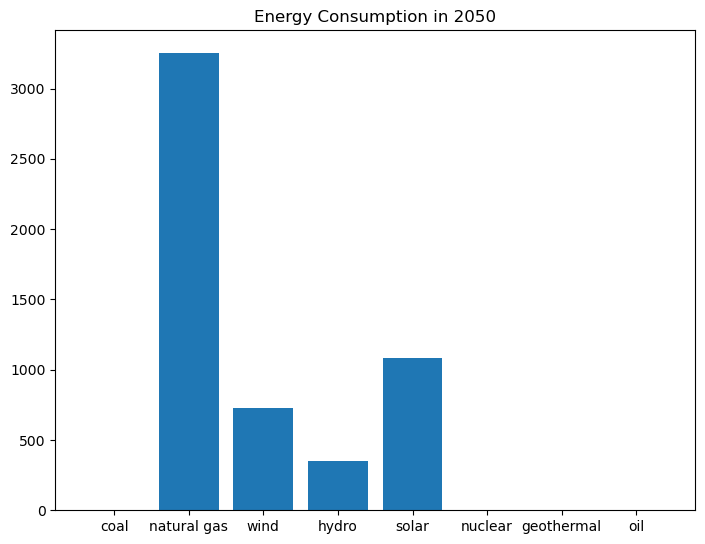

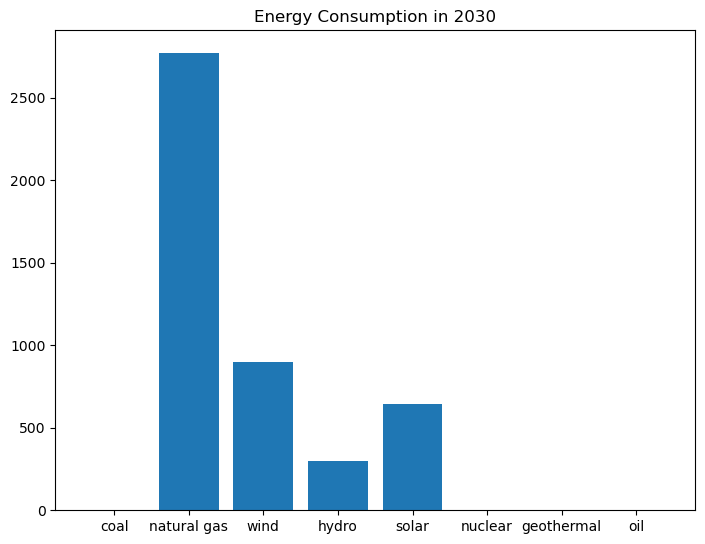

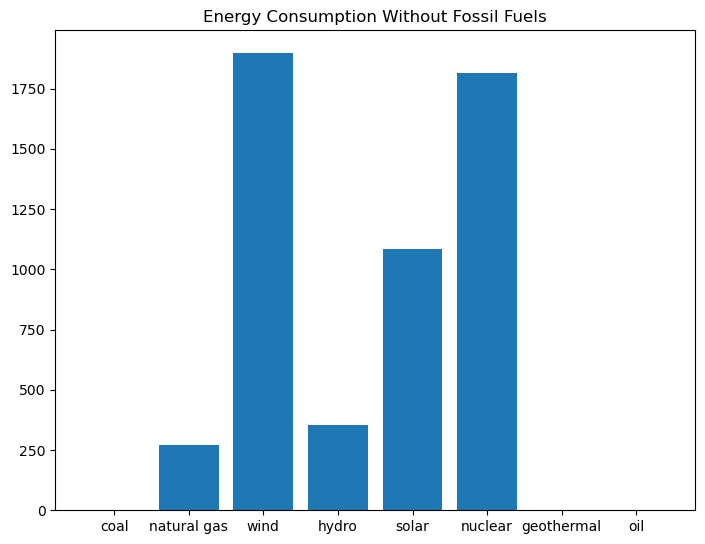

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/caoyuxin0406/.julia/packages/PyCall/L0fLP/src/numpy.jl:67
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [22]:
using PyPlot

amounts_2030 = [coal_2030, ng_2030, w_2030, h_2030, s_2030, n_2030, g_2030, o_2030];
amounts_2050 = [coal_2050, ng_2050 , w_2050, h_2050, s_2050, n_2050, g_2050, o_2050];
amounts_hypo = [coal_hypo, ng_hypo, w_hypo, h_hypo, s_hypo, n_hypo, g_hypo, o_hypo];

energy = ["coal", "natural gas", "wind", "hydro","solar","nuclear","geothermal","oil"]



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(energy,amounts_2050)
plt.title("Energy Consumption in 2050")
fig.show()


fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(energy,amounts_2030)
plt.title("Energy Consumption in 2030")
fig1.show()


fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(energy,amounts_hypo)
plt.title("Energy Consumption Without Fossil Fuels")
fig1.show()

## 4. Results and discussion ##

### 4.A. Integrated Model ###

#### 4.A.a. Economic Mode ####

We use stacked bar plots to visualize optimal solutions of the integrated model. We first define two functions that plot solutions by source or by sector to avoid duplicate codes.

In [23]:
using StatsPlots

# function to plot optimal solution by energy source
function plotSolutionBySource(energy, title) 
    # amount of consumption of each sector (consists of different energy sources)
    transportation = energy[:, :Trans]
    industrial = energy[:, :Indus]
    residential = energy[:, :Resid]
    commercial = energy[:, :Comm]
    electric_power = energy[:, :ElecPow]

    # plot the stacked bar chart of source consumption grouped by sector
    groupedbar([transportation industrial residential commercial electric_power ],
            bar_position = :stack,
            bar_width=0.7,
            xlabel = "Energy Consumption (in MWh)",
            ylabel = "Source",
            yticks=(1:10, SOURCES),
            label=["transportation" "industrial" "residential" "commercial" "electric power"],
            title = title,
            orientation = :horizontal)
end
;

In [24]:
using StatsPlots

# function to plot optimal solution by sector
function plotSolutionBySector(energy, title)
    # amount of consumption of each energy source (consists of different sectors)
    petroleum = energy[:Petroleum, :]
    gas = energy[:Natural_Gas, :]
    coal = energy[:Coal, :]
    nuclear = energy[:Nuclear, :]
    hydro = energy[:Hydroelectric, :]
    geothermal = energy[:Geothermal, :]
    solar = energy[:Solar, :]
    wind = energy[:Wind, :]
    biomass = energy[:Biomass, :]
    electricity = energy[:Electricity, :]

    # plot the stacked bar chart of sector consumption grouped by source
    groupedbar([petroleum gas coal nuclear hydro geothermal solar wind biomass electricity],
            bar_position = :stack,
            bar_width=0.5,
            xlabel = "Energy Consumption (in MWh)",
            ylabel = "Sector",
            yticks=(1:5, [:Transport,:Industrial,:Residential,:Commercial,:Electric_Power]),
            label=["petroleum" "natural gas" "coal" "nuclear" "hydroelectirc" "geothermal" "solar" "wind" "biomass" "electricity"],
            title = title,
            orientation = :horizontal)
end
;

Below are two plots for the optimal solution of the linear model with an objective of minimizing cost in 2020. The first stacked bar plot displays the amount of energy consumption (in megawatt-hours) for each of the energy sources, grouped by sectors. The second bar plot displays the amount of energy consumption (in megawatt-hours) for each of the sectors, grouped by sources. We display the detailed solution of 2020 as an example, and the solution for 2030 and 2050 would be similar.

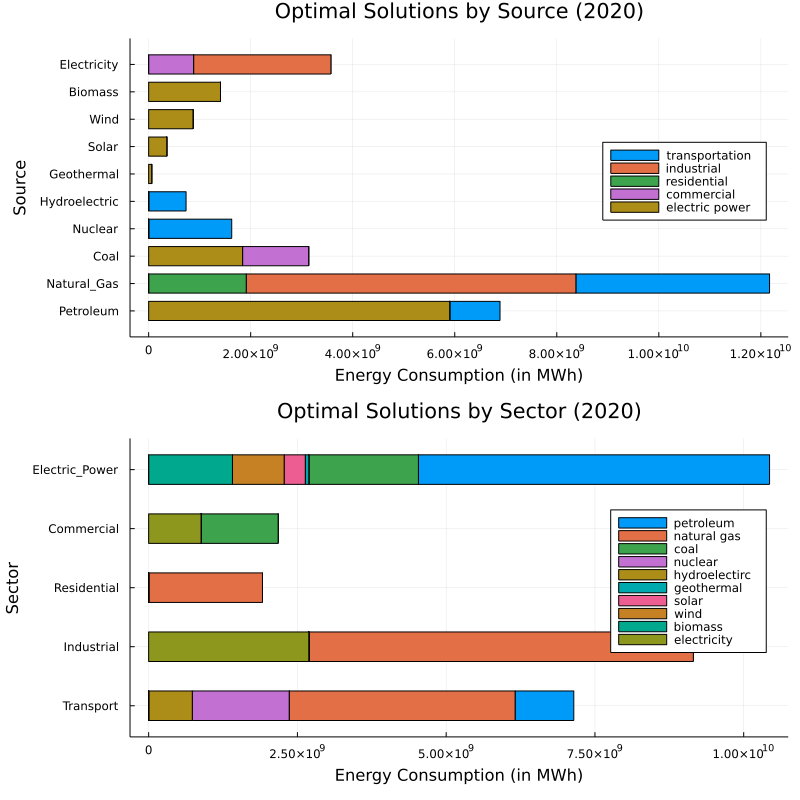

objc[47372]: Class QMacAutoReleasePoolTracker is implemented in both /Users/caoyuxin0406/.julia/conda/3/lib/libQt5Core.5.12.9.dylib (0x215126528) and /Users/caoyuxin0406/.julia/artifacts/a0db4e704fd0da4298744f012883535d351fa170/lib/QtCore.framework/Versions/5/QtCore (0x22c1cb918). One of the two will be used. Which one is undefined.
objc[47372]: Class QT_ROOT_LEVEL_POOL__THESE_OBJECTS_WILL_BE_RELEASED_WHEN_QAPP_GOES_OUT_OF_SCOPE is implemented in both /Users/caoyuxin0406/.julia/conda/3/lib/libQt5Core.5.12.9.dylib (0x2151265a0) and /Users/caoyuxin0406/.julia/artifacts/a0db4e704fd0da4298744f012883535d351fa170/lib/QtCore.framework/Versions/5/QtCore (0x22c1cb990). One of the two will be used. Which one is undefined.
objc[47372]: Class KeyValueObserver is implemented in both /Users/caoyuxin0406/.julia/conda/3/lib/libQt5Core.5.12.9.dylib (0x2151265c8) and /Users/caoyuxin0406/.julia/artifacts/a0db4e704fd0da4298744f012883535d351fa170/lib/QtCore.framework/Versions/5/QtCore (0x22c1cb9b8). One of

In [25]:
a = plotSolutionBySource(energy1_2020, "Optimal Solutions by Source (2020)")
b = plotSolutionBySector(energy1_2020, "Optimal Solutions by Sector (2020)")
Plots.plot(a, b, layout=(2,1), size=(800, 800), legend=:right)

From the above plot, we noticed that to minimize the total cost of energy consumption in 2020, natural gas would be the mostly consumed energy source, then petroleum, electricity and coal. Renewable energy is usually more expensive to generate so less renewable energy is produced and consumed. The amount that each energy source is consumed is also largely constrained by the total supply of that energy source, so we would focus more on proportions rather than absolute values. 

By combing results of two plots, we identified that the majority of natural gas would be consumed by the industrial sector. Natural gas is also a major source for the transportation sector, which deviated from our expectations that petroleum would be the major energy source in transportation, probably because we did not specify any constraints on the range of petroleum consumed by transportation sector. Instead, most petroleum in our solution will be used in electricity generation. Most renewable energys are used to generate electricity as well. Another interesting observation is that coal is used neither transportation nor residential sectors, which matches the reality that these two sectors no longer use coal.

To examine energy consumption by sector, the electric power sector consumes the most energy of all types. The industrial sector demands the largest amount of energy among four end-use sectors, while residential consumption is the least. Renewable energys such as biomass and wind are mainly used to generate electricity.

In [26]:
using PyPlot

# function to plot pie chart showing the distribution/proportion of energy consumption by source
# for years 2020, 2030, and 2050, respectively
function plotBySourceAndYear(energy_year1, energy_year2, energy_year3, title1, title2, title3)
    # calculate distribution of energy consumption by source in 2020
    totalEnergy_year1 = sum(energy_year1)
    distribution_year1 = []
    for i in 1:10
        rowSum = sum(energy_year1[i,:])
        push!(distribution_year1, rowSum/totalEnergy_year1)
    end

    # calculate distribution of energy consumption by source in 2030
    totalEnergy_year2 = sum(energy_year2)
    distribution_year2 = []
    for i in 1:10
        rowSum = sum(energy_year2[i,:])
        push!(distribution_year2, rowSum/totalEnergy_year2)
    end

    # calculate distribution of energy consumption by source in 2050
    totalEnergy_year3 = sum(energy_year3)
    distribution_year3 = []
    for i in 1:10
        rowSum = sum(energy_year3[i,:])
        push!(distribution_year3, rowSum/totalEnergy_year3)
    end
    
    # plot the pie charts for each year
    labels = ("petroleum", "natural gas", "coal", "nuclear", "hydroelectirc", 
        "geothermal", "solar", "wind", "biomass", "electricity")
    explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. "Natural gas")

    # plot the pie chart for 2020
    fig1, ax1 = plt.subplots()
    ax1.pie(distribution_year1, explode=explode, labels=labels, autopct="%1.1f%%",
            shadow=true, startangle=90)
    ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    PyPlot.title(title1)

    # plot the pie chart for 2030
    fig2, ax2 = plt.subplots()
    ax2.pie(distribution_year2, explode=explode, labels=labels, autopct="%1.1f%%",
            shadow=true, startangle=90)
    ax2.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    PyPlot.title(title2)

    # plot the pie chart for 2050
    fig3, ax3 = plt.subplots()
    ax3.pie(distribution_year3, explode=explode, labels=labels, autopct="%1.1f%%",
            shadow=true, startangle=90)
    ax3.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    PyPlot.title(title3)

    plt.show()
end
;

To examine how U.S. energy consumption might change in next few decades, we use three pie charts to illustrate how will the proportion of each energy source in total energy consumption change over time.

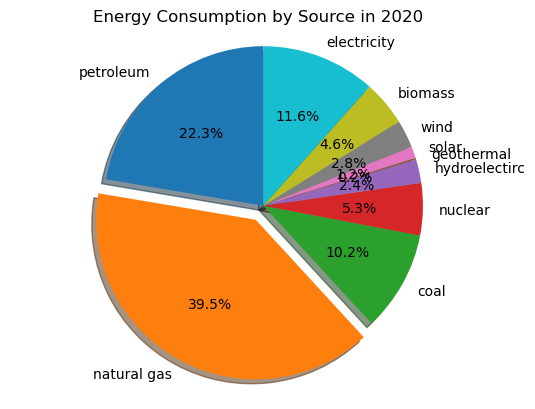

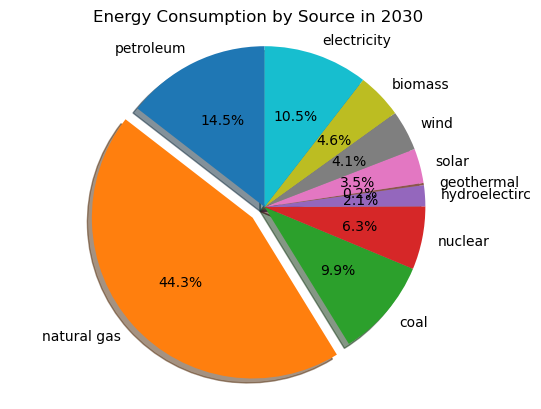

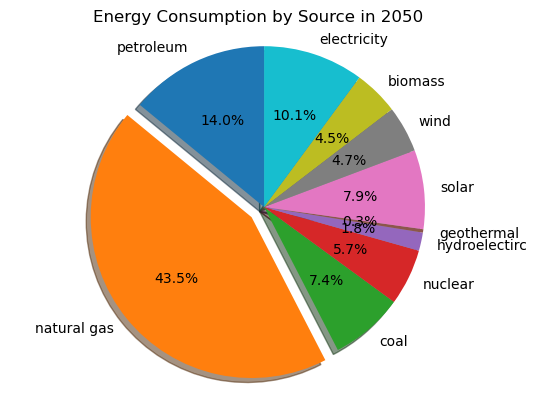

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [27]:
plotBySourceAndYear(energy1_2020, energy1_2030, energy1_2050, 
    "Energy Consumption by Source in 2020", "Energy Consumption by Source in 2030", 
    "Energy Consumption by Source in 2050")

One explicit pattern for U.S. energy consumption is that natural gas will continue to be the dominant energy source in the next three decades, and the proportion of natural gas consumption in total consumption will even increase due to decreases in natural gas prices. The proportion of petroleum is predicted to decrease form 22% in 2020 to about 14% in 2030 and 2050. The proportion of coal consumption will also decrease to 7.4% in 2050. Another notable trend is that the total proportion of renewable consumption will increase from 10.3% in 2020 to 14.5% in 2030 and 19.2% in 2050. The most prominent of renewable consumption is the growth in percentage of solar energy - from 1.2% in 2020 to 3.5% in 2030 and 7.9% in 2050. This is probably because solar energy is predicted to be much cheaper in 2050 compared to that in 2020.

#### 4.A.b. Economic-Environmental Mode ####

Below are two plots that illustrate the optimal solutions for the integrated model with the objective considering both cost and carbon emissions in 2020. Similarly, one plot shows the energy consumption for each energy source grouped by sectors, and another plot shows the energy consumption for each end-use sectors grouped by energy sources. Solutions of 2030 and 2050 could be displayed in the same way.

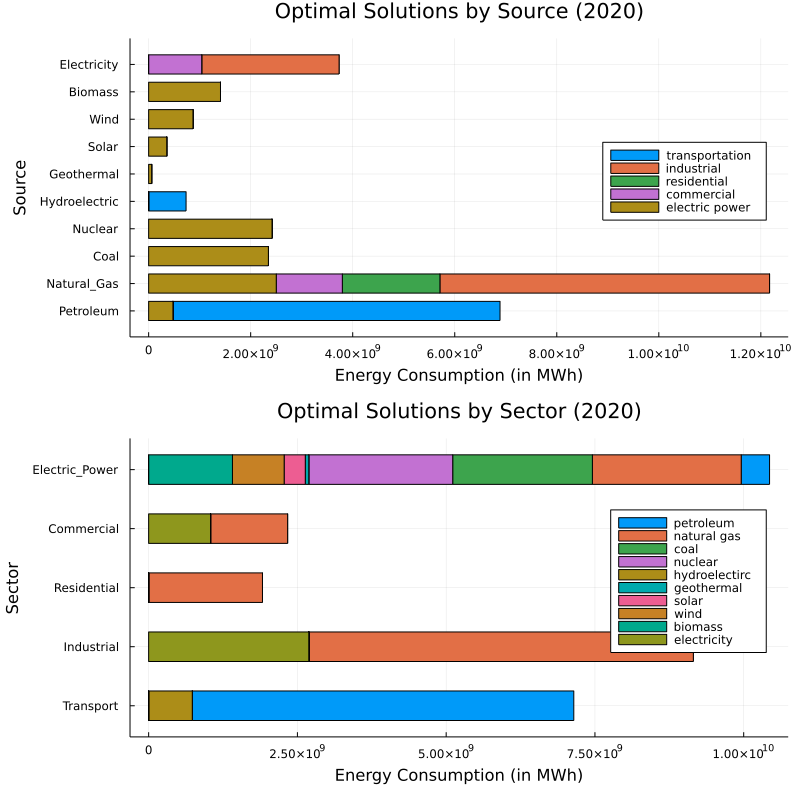

In [28]:
c = plotSolutionBySource(energy2_2020, "Optimal Solutions by Source (2020)")
d = plotSolutionBySector(energy2_2020, "Optimal Solutions by Sector (2020)")
Plots.plot(c, d, layout=(2,1), size=(800, 800), legend=:right)

After changing the objective to minimize both cost and carbon dioxide emissions, we noticed that natural gas is still the mostly consumed energy source in 2020 because of the fact that natural gas is the mostly produced energy source in the U.S. The difference between solutions of this economic-environmental mode and the economic mode is that natural gas is also used in commercial and electric power sectors. 

Another interesting observation is that petroleum now becomes the dominant source and accounts for about 90 percent of energy consumption in the transportation sector, which matches the real situation. Though we did not specify a constraint for the range of petroleum consumption in transportation sector, we obtain this result by shifting from the economic mode to economic-environmental mode (may be coincidence though).

Similar to results from the economic mode, most renewable energys are used to generate electricity. The electric power sector has highest energy consumption and is the most diverse in types of energy used, including fossil fuels, nuclear, and renewables. Also, the results would become more convincing if we add some constraints to ensure the minimal electricity consumption in residential and transportation sectors as our results did not distribute any electricity to these two sectors that use electricity in reality. The only energy source used in residential sector is natural gas, which may not be very realistic as electricity also accounts for about half of energy consumption in reality (the other half is indeed natural gas).

Coal is now solely used in electricity generation, which is likely a result of switching to this economic-environmental mode because coal generates the most amount of carbon dioxide per unit among all energy sources. This meets our expectation that, by placing more weights on carbon emissions in the objective function, we will switch from fossil fuels to cleaner energy such as nuclear and renewables.

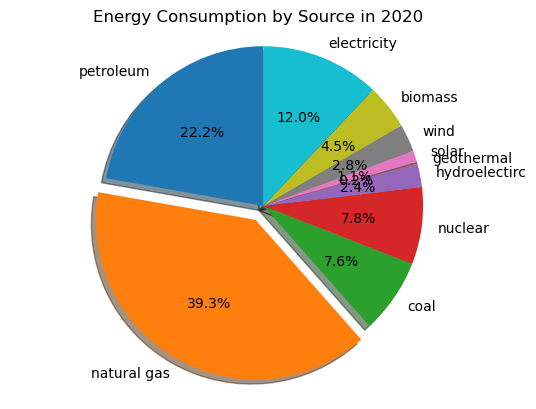

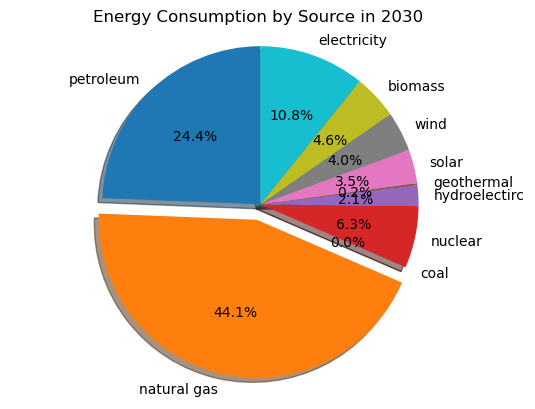

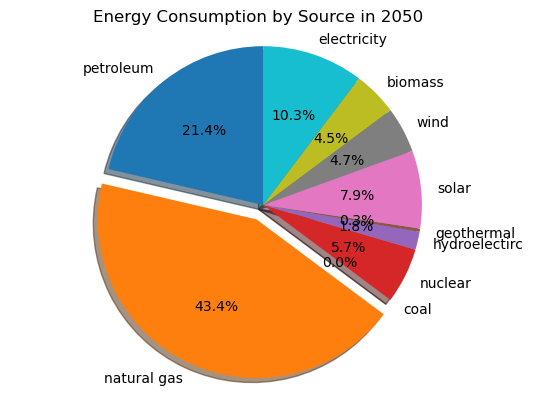

In [29]:
plotBySourceAndYear(energy2_2020, energy2_2030, energy2_2050, 
    "Energy Consumption by Source in 2020", "Energy Consumption by Source in 2030", 
    "Energy Consumption by Source in 2050")

In this economic-environmental mode (with $\lambda=100$), the trend of natural gas consumption is similar to that in the economic mode - increase by 4~5% in 2030 and 2050. 

However, the trend of petroleum consumption is somehow the opposite, the proportion of petroleum consumption will rise from 22.2% in 2020 to 24.4% in 2030, which is quite surprising as petroleum is a major source of energy-related carbon emissions. As a result of the additional carbon emission term in the objective, the proportions of coal consumption reduce drastically compared to the solutions when we only consider cost. Coal consumption actually becomes 0 percent in 2030 and 2050, so the increase in petroleum consumption may be a compensation to these decreases in coal consumption as petroleum is slightly more "environmentally-friendly" than coal.

The total proportion of renewable consumption will increase from 11% in 2020 to 14.4% in 2030 and 19.2% in 2050. The most prominent of renewable consumption is still the growth in percentage of solar energy. The proportions of renewable consumption in these economic-environmental mode are very similar to that in the previous economic mode, so we may conclude that cost is more dominant than carbon emissions in determining this optimal solutions.

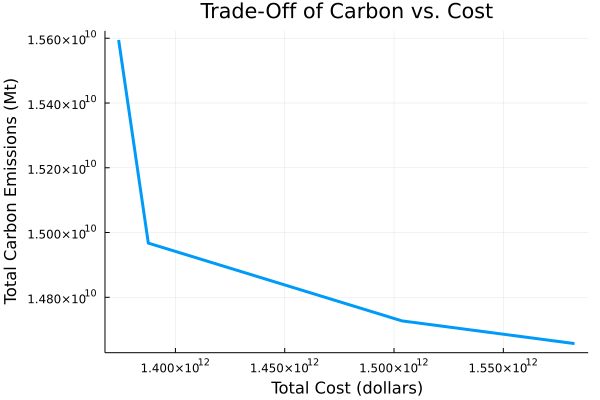

In [30]:
using Plots
Plots.plot(J1_list, J2_list, 
     title = "Trade-Off of Carbon vs. Cost",
     xlabel = "Total Cost (dollars)", ylabel = "Total Carbon Emissions (Mt)",
     legend = false, lw = 3)

The above digram demonstrates the trade-off "curve" between energy-related carbon emissions and cost of energy consumption for the regularization problem. It is convex as we expected. There is a clear trade-off between our two goals - the total carbon emission will go up if we want to reduce the cost of energy consumption, whereas it will burden the economy if we want to alleviate the environmental impact of energy consumption.

The trade-off "curve" is not smooth everywhere and instead is piecewise-linear. In a certain range of consumption cost ($\lambda$ values), the trade-off rate between carbon emissions and cost seems to be constant, which means that the additional cost to decrease the total carbon emissions by one unit is about the same in that range. We also observe that the marginal cost of decreasing carbon emissions by one unit increases as total carbon emissions decrease (goes to right side of the plot), illustrated by the flatter slope as total carbon emission decrease.

In [31]:
# calculate the carbon emissions by source in 2020
sourceCarbon_2020 = []
for i in 1:n_i
    rowSum = sum(energy2_2020[i,:] * P_2020[i])
    push!(sourceCarbon_2020, rowSum)
end
push!(sourceCarbon_2020, sum(energy2_2020[10,:] * Q_2020[1]))

# calculate the carbon emissions by source in 2030
sourceCarbon_2030 = []
for i in 1:n_i
    rowSum = sum(energy2_2030[i,:] * P_2020[i])
    push!(sourceCarbon_2030, rowSum)
end
push!(sourceCarbon_2030, sum(energy2_2030[10,:] * Q_2020[1]))

# calculate the carbon emissions by source in 2050
sourceCarbon_2050 = []
for i in 1:n_i
    rowSum = sum(energy2_2050[i,:] * P_2020[i])
    push!(sourceCarbon_2050, rowSum)
end
push!(sourceCarbon_2050, sum(energy2_2050[10,:] * Q_2020[1]))

# create a Named Array that contains carbon emissions by source in 2020, 2030, and 2050
source = collect(1:10)
year = collect(1:3)
SOURCES = [:Petroleum,:Natural_Gas,:Coal,:Nuclear,:Hydroelectric,:Geothermal,:Solar,:Wind,:Biomass,:Electricity]
YEARS = [2020, 2030, 2050]
matrix = hcat(sourceCarbon_2020, sourceCarbon_2030, sourceCarbon_2050)
carbonBySource = NamedArray([ matrix[i,j] for i in source, j in year ], (SOURCES,YEARS), ("SOURCE","YEAR"));

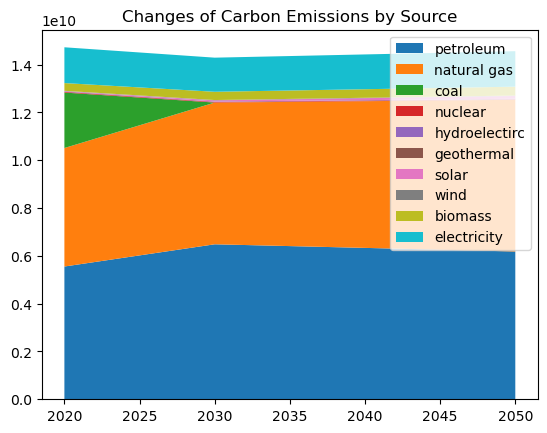

In [32]:
using PyPlot

# extract the amount of carbon emissions of each source in 2020, 2030, and 2050
y1 = carbonBySource[:Petroleum,:]
y2 = carbonBySource[:Natural_Gas,:]
y3 = carbonBySource[:Coal,:]
y4 = carbonBySource[:Nuclear,:]
y5 = carbonBySource[:Hydroelectric,:]
y6 = carbonBySource[:Geothermal,:]
y7 = carbonBySource[:Solar,:]
y8 = carbonBySource[:Wind,:]
y9 = carbonBySource[:Biomass,:]
y10 = carbonBySource[:Electricity,:]

# the plot is labeled/grouped by types of energy source
labels = ("petroleum", "natural gas", "coal", "nuclear", "hydroelectirc", 
    "geothermal", "solar", "wind", "biomass", "electricity")

fig, ax = plt.subplots()
ax.stackplot(YEARS, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, labels=labels)
ax.legend()
PyPlot.title("Changes of Carbon Emissions by Source")
plt.show()

Above is a diagram showing the changes of carbon emissions by source over years 2020, 2030, and 2050 in the economic-environmental mode of the integrated model. The total carbon emissions in 2030 seem to the lowest among three years. The contributions of petroleum and natural gas to carbon emissions are predicted in increase over the next three decades. Renewables only account for a minor proportion of total carbon emissions, which will be almost constant during the next few decades.

### 4.B. Electricity Model

From the results of our model, we can see thaat it is indeed possible to meet the projected energy goals set by the Biden administration by the years 2030 and 2050 should US electricity demand follow historical trends and renewnable technology progress as intended. The transition between 2030 shows how as renewable technology continues to become more broadly widespread, it will have the effect of reducing natural gas consumption and thus help the electricity sector move away from fossil fuel dependance. Another interesting fact to note is that the price of overall electricity generation increased slighly between the two years in question. The projected cost of electricity generation during 2030 would be around 358 billion dollars while the estimated cost for electricity generation during 2050 instead ranges around 411 billion dollars. This price change may mark a potentially worrying trend to consumers as an increase in the price of electricity generation would likely drive up the prices of all other economic services causing stress on ordinary consumers. In addition, it can be seen that although no bounds were placed upon nuclear energy, coal, or oil, none of each type was chosen for fuel in our model. This suggests that these energy sources may not be as efficient as solar and wind energy for producing electricity.

Although this model was able to establish the validity of projected carbon emisison goals, it made several simplifications which may lead to some innacuracies. Some such assumption that this model made was that cost of renewable energy was just the cost of electricity generation. In reality, there exist additional maintenence costs associated with the upkeep of these renewable energy sources and integrating them into the existing electric grid is costly adn expensive. As such, the cost of such installation is not considered within this model making this model an over-simplification. Another assumption made in this model is that all sources of renewable energy are evenly distriuted across the country. One of the major advantages of fossil fuels is their acessibility: regardless of where you are in the United States, fossil fuels will always generate the same amount of energy making them an extremely relaible source of energy. The same cannot be same about renewables as specific locations may contain differing amounts of avaliable renewables. This can be seen in the following images taken from the Natural Renewable Energy Laboratory which shows the varying ditribution of Solar, Wind and Geothermal Energy across the United States.

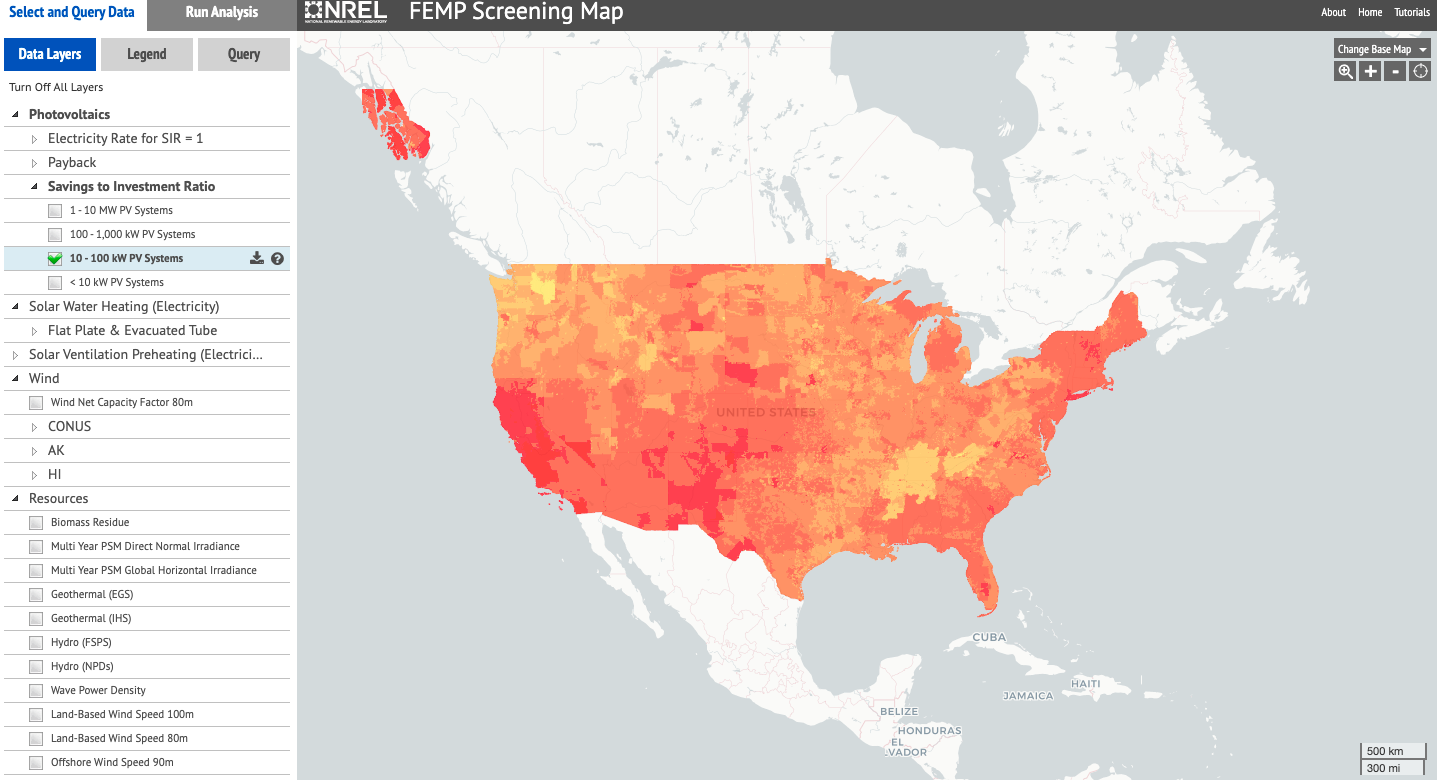

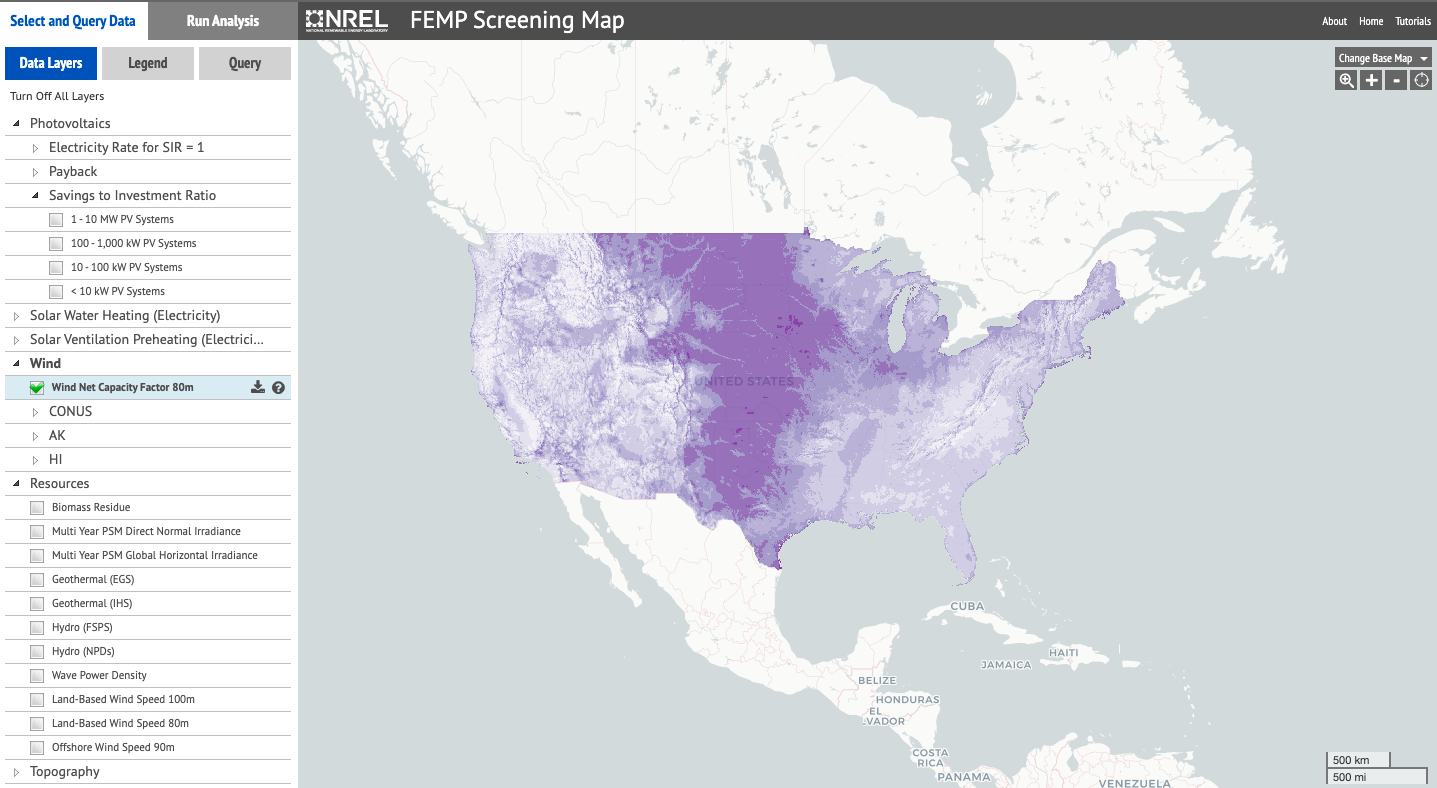

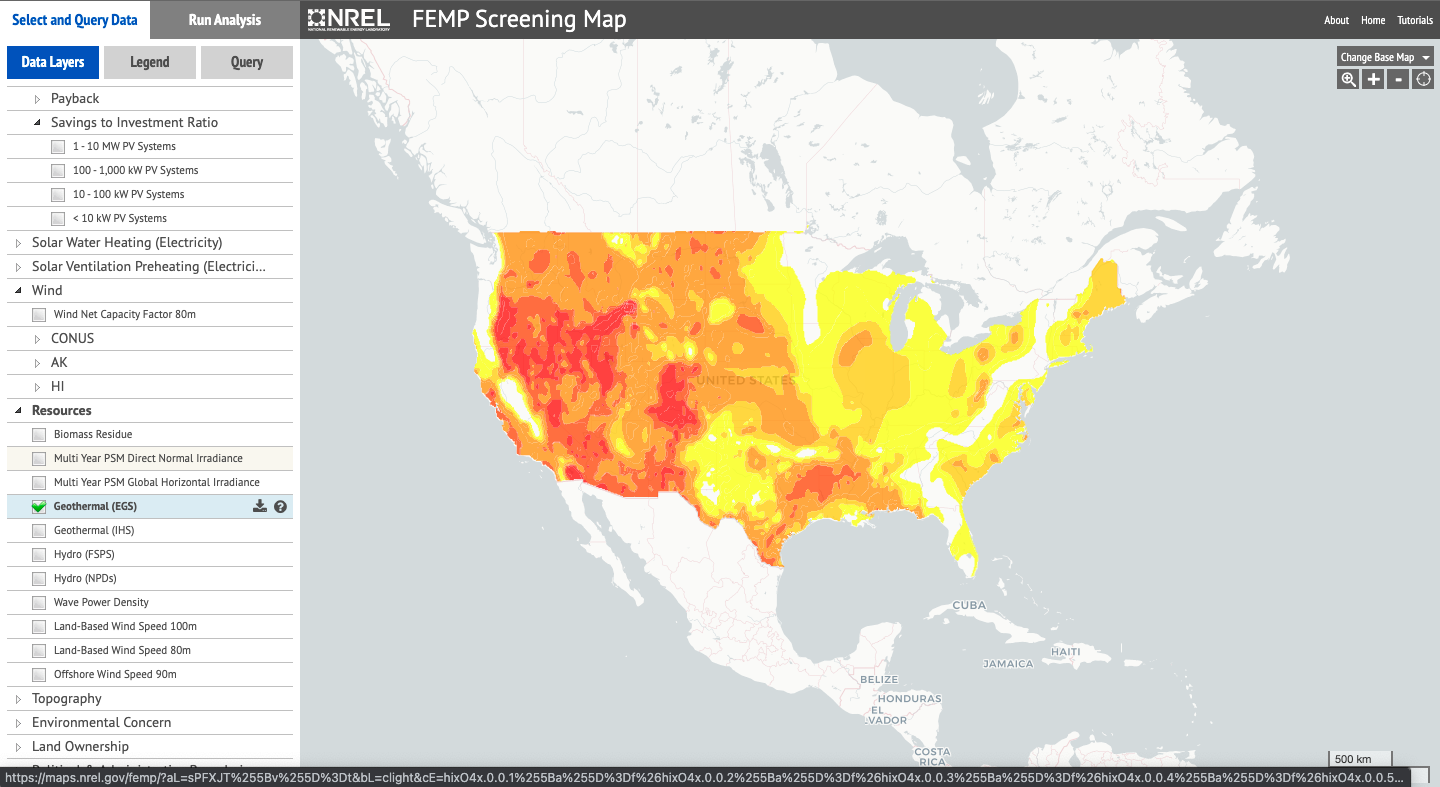

The large disparities between the energy avaliability may prove to be difficult as ensuring that all reigions of the United States are able to have enough energy at any given moment would require a tremendous amount of coordination across multiple regions of the United States. 

In our final model, we consider the case where we rely almost exclusively upon renewable energy sources for electricity generation mirroring the hopes of many for the future. In the results of this model, we can see that electricity generating shifts away from relying upon natural gas to instead rely upon solar, wind, and nuclear energy sources. All three of these energy sources have major limitations associated with them. Both solar and wind energy are difficult to harvest and store efficiently in batteries, and pose problems synching to the correct frequencies to match the levels of the grid. In addition, solar and wind energy is not constant and may fluctate on a day to day basis. This variability may be extremely destructive to the electrical grid as any excess demand on a particuar day when solar and wind energy supply is low may place extra burden upon the electrical system. Another issue with fully switching to renewables is the increased reliance of nuclear energy. Although nuclear energy does not produce the same levels of carbon-dioxide as convential fossil fuels do, it is still based on a naturally occuring element: Uranium. As such, relying soley upon Uranium to provide the majortiy of the country's energy needs does not solve the problem of eventually running out of energy sources. Another major issue with the usage of nuclear energy is the problem of nuclear waste. Nuclear reactors generate large quantities of higly radioactive waste that remains dangerous for hundreds of thousands of years. To be able to rely upon nuclear energy more sucessfully, we must first discuss a long-term solution of the safe treatment and disposal of this nuclear waste. In  Taddition to the concerns about the efficacy of the fully renewable model, it comes at a much higher cost to consumer costing nearly 800 billion dollars to generate the projected amount of electricity. This is almost double what is expected of the other models, and serves as another limitation upon the viability of a fully renewable energy system.
   
   
Overall, the reuslts of this model show that with additional investment into renewables, it is highly likely that we are able to meet the deadliens pushed by the Biden administration. Full dependence on renewable energy still remains unobtainable given current techonology and will take massive overhauls to the electric grid and current infrasturcture to acheive. 

## 5. Conclusion ##

Our project explores different ways to model the problem of U.S. energy consumption as a linear program and solve for optimal solutions in current and future years. By comparing results from different years, we found that while fossil fuels would continue to be the dominant energy source, we are also expecting an increased consumption in cleaner energys such as renewables and nuclear energy, owing to predicted lower costs of these energys.

### Limitations and Future Directions ###
* **Model other sectors**. Due to space limitations, we did not model all sectors for energy consumption, and therefore we were unable to verify if our approach works well for all sectors and compare results from different sectors. We would also like to further explore how energy consumption in each end-use sector is likely to change in the next few decades.


* **Change to Mixed-Integer Program**. We primarily model the problem of U.S. energy consumption as a linear program. There are other modelling options such as Mixed-Integer Program that are worthwhile to try out. In the integrated model, we did not incorporate any range limitations for consumption of certain energy source in certain sector. We could add this type of constraints in a MIP, such as adding a constraint stipulating that the oil consumption of the transportation sector cannot be less than a certain amount.


* **Update parameter data**. Some assumptions we made about future parameters, such as assuming efficiencies of different energy sources in electricity generation to be constant over next 30 years, should definitely be loosen. While efficiencies are likely to increase in the future, we should update our results based on these new data.


* **Consider various forms of the same energy source**. In this project, we only assume that each type of source energy in consumed in a single form, which is a simplification of real-world circumstance. For renewable energy, technologies of the generating plant would affect its efficiency and levelized cost. A possible way to improve our model is to include different forms of energy, though this will make our model more complicated.

## 6. Author Contributions

Note: The contributions in each category must sum to 100%. See Canvas for more details on what type of work belongs in each category.

#### 1. Modelling  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  

  
#### 2. Analysis  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 3. Data Gathering  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 4. Software Implementation  
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  


#### 5. Report writing and poster presentation   
Student A: Percentage contribution %  
Student B: Percentage contribution %  
Student C: Percentage contribution %  

## References

* https://www.eia.gov/outlooks/aeo/data/browser/#/?id=3-AEO2020&region=1-0&cases=ref2020&start=2018&end=2050&f=Q&linechart=~~ref2020-d112119a.39-3-AEO2020.1-0&map=ref2020-d112119a.4-3-AEO2020.1-0&ctype=linechart&sourcekey=0

* https://geospatial.blogs.com/geospatial/2010/01/energy-efficiency-of-fossil-fuel-power-generation.html

* https://www.eia.gov/totalenergy/data/browser

* https://www.energy.gov/sites/prod/files/2015/08/f25/LCOE.pdf

* https://www.lazard.com/media/451419/lazards-levelized-cost-of-energy-version-140.pdf

* https://www.eia.gov/outlooks/steo/report/electricity.php#:~:text=We%20estimate%20that%20the%20U.S.,by%2013%20GW%20in%202021.

* https://www.greentechmedia.com/articles/read/wind-could-make-up-one-third-of-us-electricity-generation-by-2050#:~:text=Wind%20Markets%20%26%20Policy-,Energy%20Department%20Says%20Wind%20Could%20Make%20Up%2035%25%20of%20US,404%20gigawatts%20by%20mid%2Dcentury.

* https://www.eia.gov/todayinenergy/detail.php?id=37392#:~:text=Carbon%20dioxide%20emissions%20from%20the,have%20declined%2028%25%20since%202005&text=U.S.%20electric%20power%20sector%20carbon,fuels%20used%20to%20generate%20electricity.

* https://maps.nrel.gov/femp/?aL=sPFXJT%255Bv%255D%3Dt&bL=clight&cE=hixO4x.0.0.1%255Ba%255D%3Df%26hixO4x.0.0.2%255Ba%255D%3Df%26hixO4x.0.0.3%255Ba%255D%3Df%26hixO4x.0.0.4%255Ba%255D%3Df%26hixO4x.0.0.5%255Ba%255D%3Df%26hixO4x.0.0.6%255Ba%255D%3Df%26hixO4x.0.0.7%255Ba%255D%3Df%26hixO4x.0.0.8%255Ba%255D%3Df&lR=0&mC=37.47485808497102%2C-89.56054687499999&zL=4

* https://www.eia.gov/totalenergy/data/annual/showtext.php?t=ptb0802a

* http://groundtruthtrekking.org/Reports/Coal-Electricity-Prices-Externalities-Analysis/1/Coal-Electricity-Prices-Externalities-Levelized-Cost/

* https://impactful.ninja/energy-sources-with-the-highest-carbon-footprint/#:~:text=Oil%2C%20coal%2C%20natural%20gas%2C,have%20various%20other%20environmental%20drawbacks.

* https://www.americanprogress.org/article/the-staggering-cost-of-new-nuclear-power/